# Problem Statement
# 1. Which locations within the King County area have the highest average house prices?

# Understanding what locations to focus the advertising campaign on is key for our stakeholders.

# 2. Which house attributes increase sale price?

# Understanding home buyers' preferences can focus our campaign and help us guide clients willing to undertake renovations prior to selling.

# 3. Does time of the year have an impact on house sales?

# Understanding seasonal trends will influence when the campaign should be launched.






In [454]:
# Obtain Data


In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [456]:
#laoding dataset
kc_data=pd.read_csv("kc_house_data.csv")
kc_data.sample(5)

id             date     price  bedrooms  bathrooms  \
3623   2767602141  20140905T000000  525000.0         3       1.50   
7320   7844200425  20150414T000000  525000.0         4       2.00   
16156  8682310470  20150107T000000  445000.0         2       1.75   
3377   7686205020  20150312T000000  144975.0         2       1.00   
8144   1545801970  20140516T000000  250000.0         3       2.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
3623          1380      4290     1.0           0     0  ...      7   
7320          2680     14157     1.0           0     0  ...      8   
16156         1440      4660     1.0           0     2  ...      8   
3377           900      7500     1.0           0     0  ...      5   
8144          1900      6660     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
3623         1080            300      1955             0    98107  47.6740   
7320         1460           1220      1966             0    98188  47.4286   
16156        1440              0      2008             0    98053  47.7092   
3377          900              0      1940             0    98198  47.4177   
8144          950            950      1966             0    98038  47.3594   

          long  sqft_living15  sqft_lot15  
3623  -122.379           1510        3900  
7320  -122.292           2100        9199  
16156 -122.015           1680        4989  
3377  -122.319           1350        7500  
8144  -122.054           1690        8111  

[5 rows x 21 columns]

In [457]:
len(kc_data)

21613

Our dataset has 21613 prices from house sales in the King County area.



#Train test split
Before proceeding further, we wish to split our data into a training set and a testing set. We will first need to seperate features from target and then we will make use of sklearn's train_test_split() function. We will choose to keep 10% of our data for final testing of our mode

In [458]:
#separate the dependent and target features
X=kc_data.drop("price",axis=1)
y=kc_data["price"]

In [459]:
#split
from sklearn.model_selection import train_test_split


In [460]:
#train test split of 10% Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=42)

In [461]:
#len of the splited data
print(len(X_train),len(X_test),len(y_train),len(y_test))

19451 2162 19451 2162


In [462]:
#trainig data
training_df=kc_data

In [463]:
training_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# cleanig of dataset


In [464]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [465]:
#changing format of date
def change_date_form(training_df):
    training_df['date']=pd.to_datetime(training_df["date"])
    return training_df


In [466]:
#apply to change format of date
training_df=change_date_form(training_df)

In [467]:
training_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [468]:
# Investigate sqft_basement column
training_df["sqft_basement"].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [469]:
# Get summary statistics for sqft_basement
training_df["sqft_basement"].astype(float)

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21608      0.0
21609      0.0
21610      0.0
21611      0.0
21612      0.0
Name: sqft_basement, Length: 21613, dtype: float64

# Dealing with null values


In [470]:
#checkign is there any null  value
training_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# checking duplicate


In [471]:
training_df.duplicated().sum()

0

There are no duplicate data in our dataset.



In [472]:
training_df["id"].duplicated().sum()

177

It indicate that house of same id may sold much more times

# Features engineering

In [473]:
# plt.figure(figsize=(20,15))
# sns.heatmap(training_df.corr(),annot=True,cbar=True,linewidths=.9)
# plt.show()

In [474]:
training_df.drop("id",axis=1,inplace=True)

In [475]:
training_df['waterfront'].corr(training_df['condition'])

0.016653157443820236

In [476]:
training_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

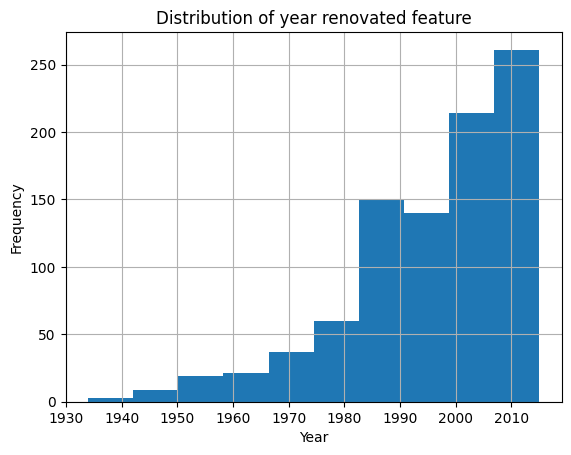

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [477]:
# Visualise yr_renovated post 1900 (to not show all the 0 values)
training_df[training_df['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")
plt.show()

plt

In [478]:
training_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Numerical FEACTURES

In [479]:
training_df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 20 columns]

In [480]:
# Define function to create was_renovated_post90 feature
def renovation_feature(df):
    '''Creates bool was_renovated_post90 feature and drops original yr_renovated feature'''
    df['was_renovated_post90'] = df['yr_renovated'].map(lambda x: 1 if x > 1990 else 0)
    return df

In [481]:
renovation_feature(training_df)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21608     3.0           0     0          3  ...        1530              0   
21609     2.0           0     0          3  ...        2310              0   
21610     2.0           0     0          3  ...        1020              0   
21611     2.0           0     0          3  ...        1600              0   
21612     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  was_renovated_post90  
0            5650                     0  
1            7639                     1  
2            8062                     0  
3            5000                     0  
4            7503                     0  
...           ...                   ...  
21608        1509                     0  
21609        7200                     0  
21610        2007                     0  
21611        1287                     0  
21612        1357                     0  

[21613 rows x 21 columns]

In [482]:
# Get summary statistics for yr_built
training_df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

<Axes: ylabel='yr_built'>

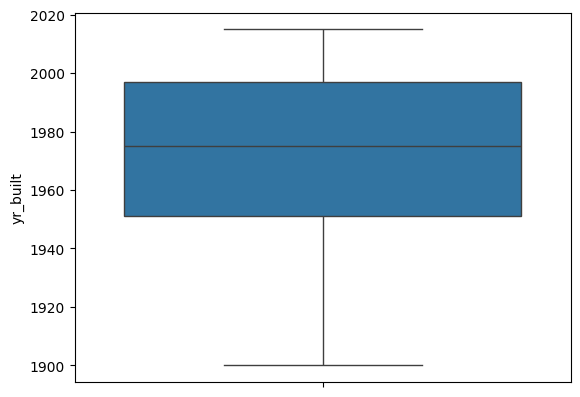

In [483]:
sns.boxplot(training_df['yr_built'])

It has no outlier

<Axes: >

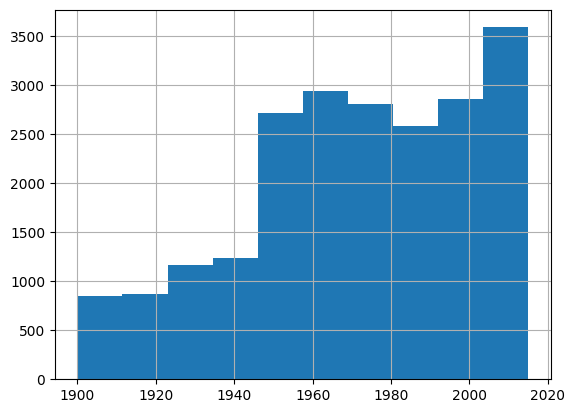

In [484]:
training_df["yr_built"].hist()

We are going to define bins as the yr_built feature should be treated as a categorical variable. We will use the summary statistics (quartiles) to define our bins, so that we have roughly the same number of data points in each bin.

In [485]:
#continuous into categorical
0# Define function to map yr_built into bins
def year_built(df):
    ''' Maps yr_built feature into categorical bins'''
    
    # Define bins based on statistics
    yr_built_bins = [1899, 1950, 1975, 1997, 2016]
    yr_built_labels = ['pre1950', '1950_to_1975', '1975_to_1997', '1997_to_2015']
    
    # Map to bins using pd.cut()
    df['yr_built'] = pd.cut(df['yr_built'], bins = yr_built_bins, labels = yr_built_labels)
    
    return df


In [486]:
#appy for the function
year_built(training_df)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21608     3.0           0     0          3  ...        1530              0   
21609     2.0           0     0          3  ...        2310              0   
21610     2.0           0     0          3  ...        1020              0   
21611     2.0           0     0          3  ...        1600              0   
21612     2.0           0     0          3  ...        1020              0   

           yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1950_to_1975            0    98178  47.5112 -122.257           1340   
1      1950_to_1975         1991    98125  47.7210 -122.319           1690   
2           pre1950            0    98028  47.7379 -122.233           2720   
3      1950_to_1975            0    98136  47.5208 -122.393           1360   
4      1975_to_1997            0    98074  47.6168 -122.045           1800   
...             ...          ...      ...      ...      ...            ...   
21608  1997_to_2015            0    98103  47.6993 -122.346           1530   
21609  1997_to_2015            0    98146  47.5107 -122.362           1830   
21610  1997_to_2015            0    98144  47.5944 -122.299           1020   
21611  1997_to_2015            0    98027  47.5345 -122.069           1410   
21612  1997_to_2015            0    98144  47.5941 -122.299           1020   

       sqft_lot15  was_renovated_post90  
0            5650                     0  
1            7639                     1  
2            8062                     0  
3            5000                     0  
4            7503                     0  
...           ...                   ...  
21608        1509                     0  
21609        7200                     0  
21610        2007                     0  
21611        1287                     0  
21612        1357                     0  

[21613 rows x 21 columns]

<Axes: >

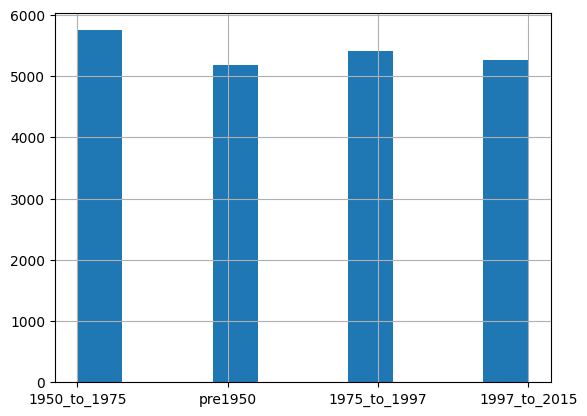

In [487]:
training_df["yr_built"].hist()

In [488]:
# Define function has_basement
def has_basement(df):
    '''creates bool feature has_basement and drops original basement feature'''
    df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

In [489]:
#appy the function
has_basement(training_df)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above      yr_built  \
0         1.0           0     0          3  ...        1180  1950_to_1975   
1         2.0           0     0          3  ...        2170  1950_to_1975   
2         1.0           0     0          3  ...         770       pre1950   
3         1.0           0     0          5  ...        1050  1950_to_1975   
4         1.0           0     0          3  ...        1680  1975_to_1997   
...       ...         ...   ...        ...  ...         ...           ...   
21608     3.0           0     0          3  ...        1530  1997_to_2015   
21609     2.0           0     0          3  ...        2310  1997_to_2015   
21610     2.0           0     0          3  ...        1020  1997_to_2015   
21611     2.0           0     0          3  ...        1600  1997_to_2015   
21612     2.0           0     0          3  ...        1020  1997_to_2015   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                0    98178  47.5112 -122.257           1340        5650   
1             1991    98125  47.7210 -122.319           1690        7639   
2                0    98028  47.7379 -122.233           2720        8062   
3                0    98136  47.5208 -122.393           1360        5000   
4                0    98074  47.6168 -122.045           1800        7503   
...            ...      ...      ...      ...            ...         ...   
21608            0    98103  47.6993 -122.346           1530        1509   
21609            0    98146  47.5107 -122.362           1830        7200   
21610            0    98144  47.5944 -122.299           1020        2007   
21611            0    98027  47.5345 -122.069           1410        1287   
21612            0    98144  47.5941 -122.299           1020        1357   

       was_renovated_post90  has_basement  
0                         0             0  
1                         1             1  
2                         0             0  
3                         0             1  
4                         0             0  
...                     ...           ...  
21608                     0             0  
21609                     0             0  
21610                     0             0  
21611                     0             0  
21612                     0             0  

[21613 rows x 21 columns]

In [490]:
# Define function has viw
def has_viewed(df):
    '''creates bool feature has_basement and drops original basement feature'''
    df['viewed'] = df['view'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

In [491]:
#appy function
has_viewed(training_df)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...      yr_built  yr_renovated  \
0         1.0           0     0          3  ...  1950_to_1975             0   
1         2.0           0     0          3  ...  1950_to_1975          1991   
2         1.0           0     0          3  ...       pre1950             0   
3         1.0           0     0          5  ...  1950_to_1975             0   
4         1.0           0     0          3  ...  1975_to_1997             0   
...       ...         ...   ...        ...  ...           ...           ...   
21608     3.0           0     0          3  ...  1997_to_2015             0   
21609     2.0           0     0          3  ...  1997_to_2015             0   
21610     2.0           0     0          3  ...  1997_to_2015             0   
21611     2.0           0     0          3  ...  1997_to_2015             0   
21612     2.0           0     0          3  ...  1997_to_2015             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  \
0       98178  47.5112 -122.257           1340        5650   
1       98125  47.7210 -122.319           1690        7639   
2       98028  47.7379 -122.233           2720        8062   
3       98136  47.5208 -122.393           1360        5000   
4       98074  47.6168 -122.045           1800        7503   
...       ...      ...      ...            ...         ...   
21608   98103  47.6993 -122.346           1530        1509   
21609   98146  47.5107 -122.362           1830        7200   
21610   98144  47.5944 -122.299           1020        2007   
21611   98027  47.5345 -122.069           1410        1287   
21612   98144  47.5941 -122.299           1020        1357   

       was_renovated_post90  has_basement  viewed  
0                         0             0       0  
1                         1             1       0  
2                         0             0       0  
3                         0             1       0  
4                         0             0       0  
...                     ...           ...     ...  
21608                     0             0       0  
21609                     0             0       0  
21610                     0             0       0  
21611                     0             0       0  
21612                     0             0       0  

[21613 rows x 22 columns]

In [492]:
#bathroom featurex
training_df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [493]:
#rounding the bathroom featurewa

training_df["bathrooms"]=training_df["bathrooms"].map(lambda x:int(round(x,1)))

In [494]:
training_df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3          1         1180      5650   
1     2014-12-09  538000.0         3          2         2570      7242   
2     2015-02-25  180000.0         2          1          770     10000   
3     2014-12-09  604000.0         4          3         1960      5000   
4     2015-02-18  510000.0         3          2         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3          2         1530      1131   
21609 2015-02-23  400000.0         4          2         2310      5813   
21610 2014-06-23  402101.0         2          0         1020      1350   
21611 2015-01-16  400000.0         3          2         1600      2388   
21612 2014-10-15  325000.0         2          0         1020      1076   

       floors  waterfront  view  condition  ...      yr_built  yr_renovated  \
0         1.0           0     0          3  ...  1950_to_1975             0   
1         2.0           0     0          3  ...  1950_to_1975          1991   
2         1.0           0     0          3  ...       pre1950             0   
3         1.0           0     0          5  ...  1950_to_1975             0   
4         1.0           0     0          3  ...  1975_to_1997             0   
...       ...         ...   ...        ...  ...           ...           ...   
21608     3.0           0     0          3  ...  1997_to_2015             0   
21609     2.0           0     0          3  ...  1997_to_2015             0   
21610     2.0           0     0          3  ...  1997_to_2015             0   
21611     2.0           0     0          3  ...  1997_to_2015             0   
21612     2.0           0     0          3  ...  1997_to_2015             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
0        98178  47.5112 -122.257           1340        5650   
1        98125  47.7210 -122.319           1690        7639   
2        98028  47.7379 -122.233           2720        8062   
3        98136  47.5208 -122.393           1360        5000   
4        98074  47.6168 -122.045           1800        7503   
...        ...      ...      ...            ...         ...   
21608    98103  47.6993 -122.346           1530        1509   
21609    98146  47.5107 -122.362           1830        7200   
21610    98144  47.5944 -122.299           1020        2007   
21611    98027  47.5345 -122.069           1410        1287   
21612    98144  47.5941 -122.299           1020        1357   

       was_renovated_post90  has_basement  viewed  
0                         0             0       0  
1                         1             1       0  
2                         0             0       0  
3                         0             1       0  
4                         0             0       0  
...                     ...           ...     ...  
21608                     0             0       0  
21609                     0             0       0  
21610                     0             0       0  
21611                     0             0       0  
21612                     0             0       0  

[21613 rows x 23 columns]

<Axes: ylabel='bathrooms'>

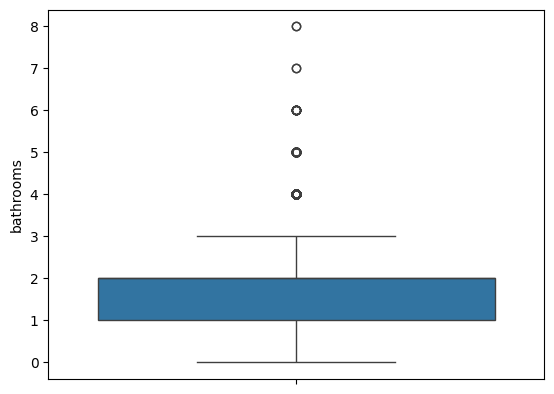

In [495]:
sns.boxplot(training_df["bathrooms"])


<Axes: ylabel='bedrooms'>

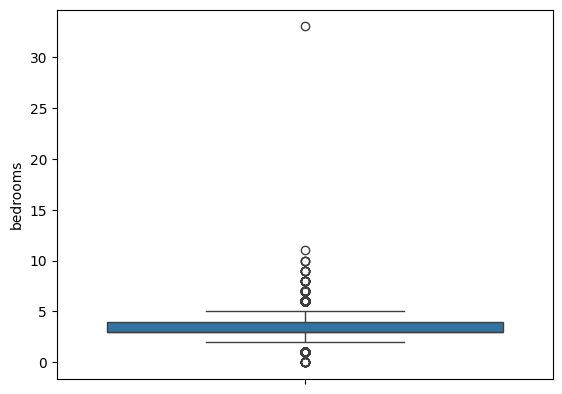

In [496]:
sns.boxplot(training_df["bedrooms"])

In [497]:
#detecting the outlier
def for_box_plot(df):
    for feature in df.columns:
        sns.boxplot(df[feature])
    

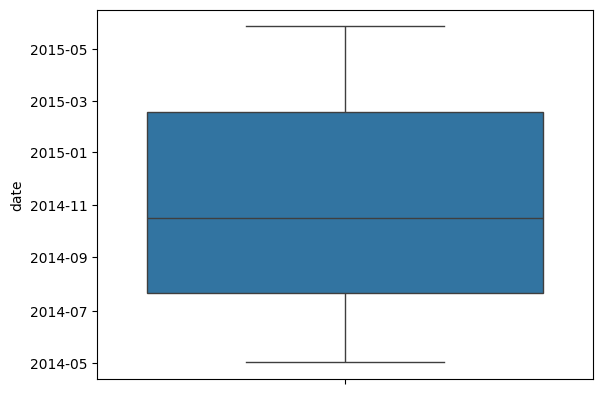

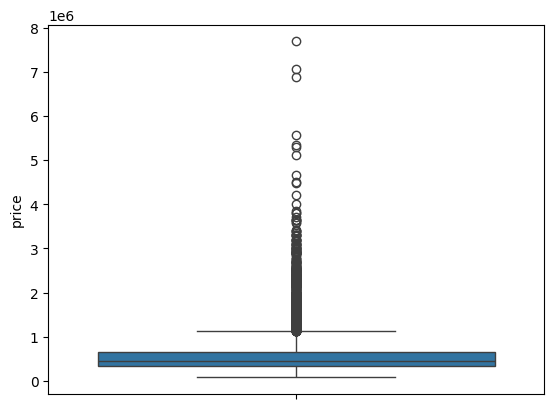

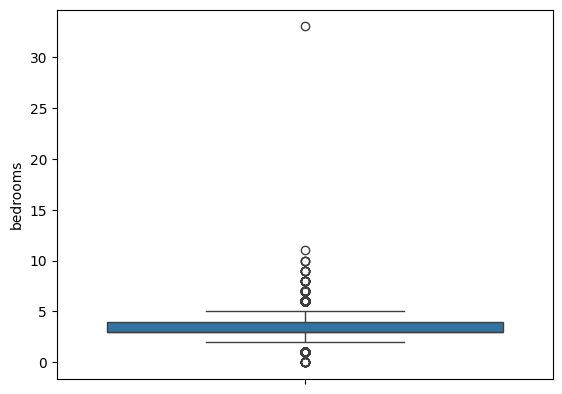

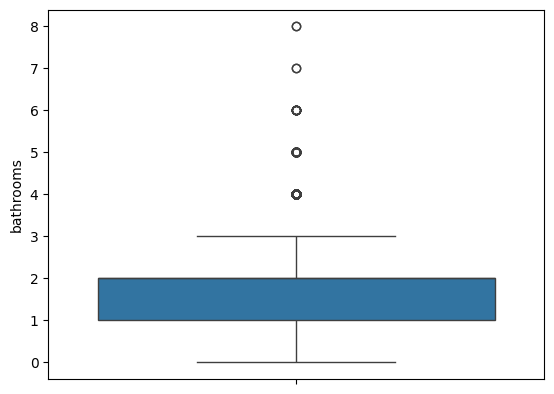

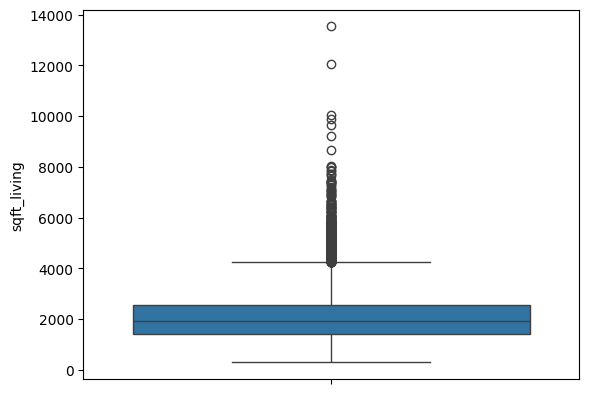

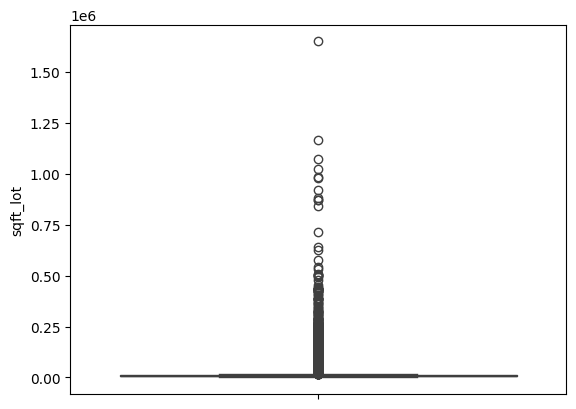

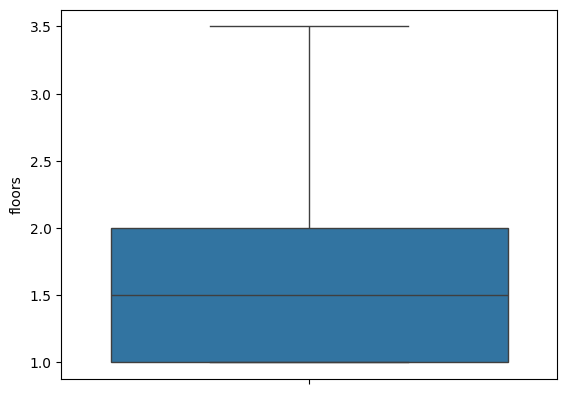

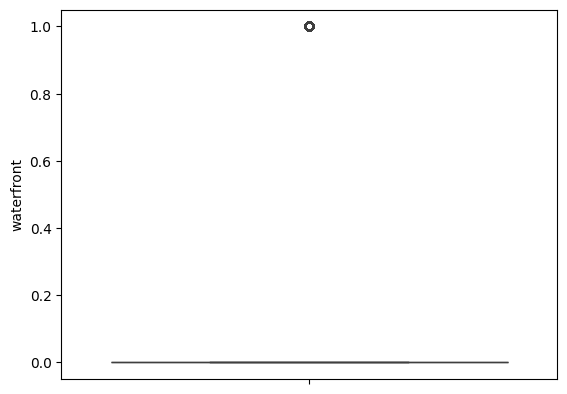

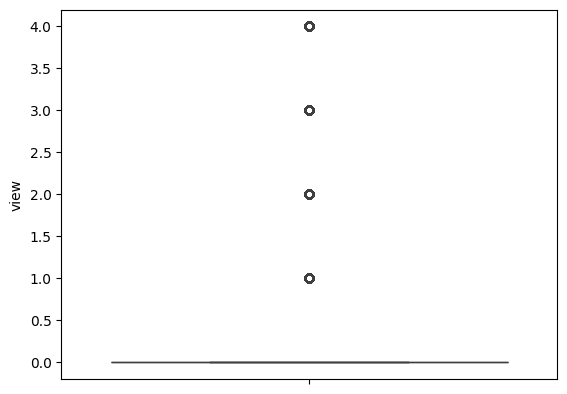

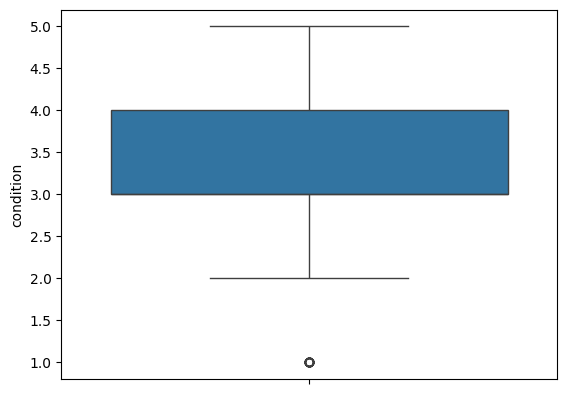

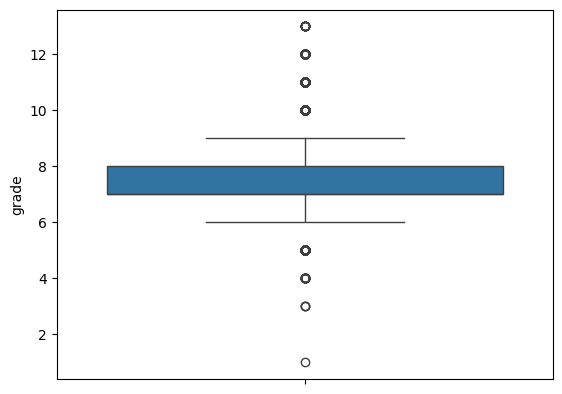

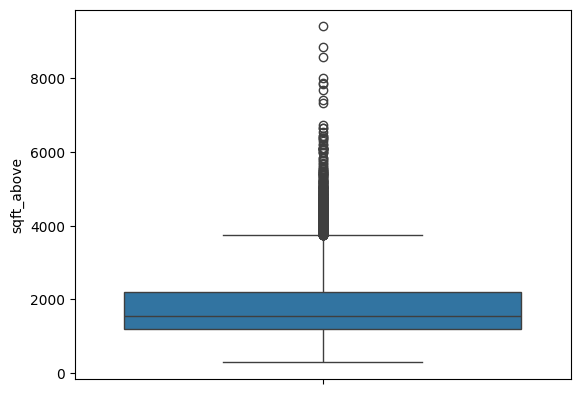

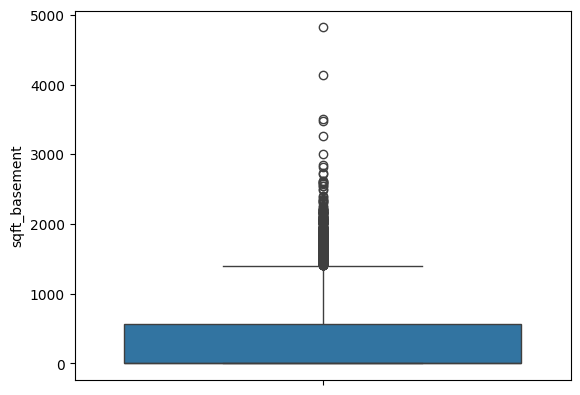

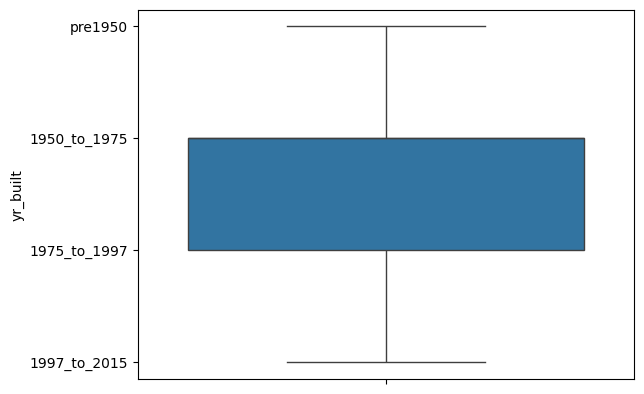

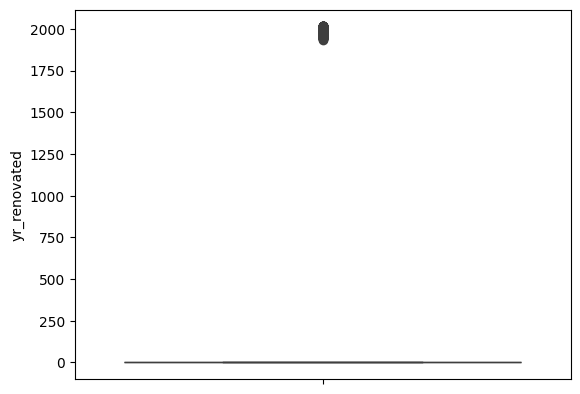

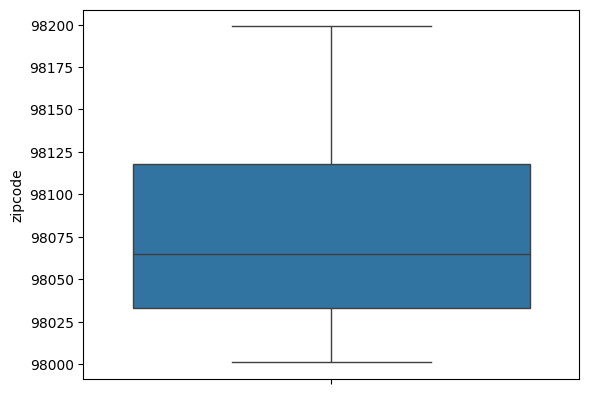

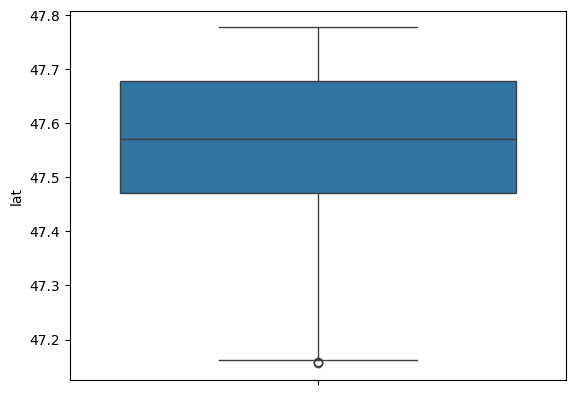

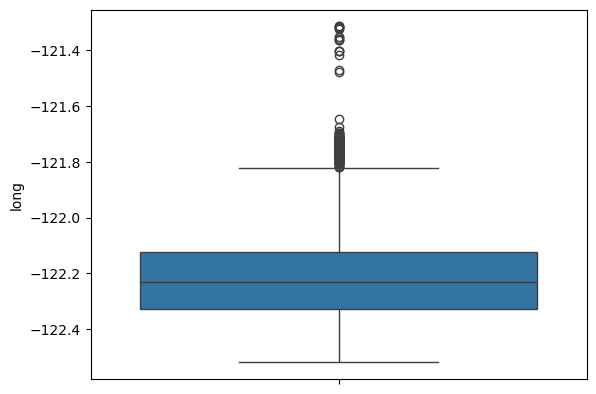

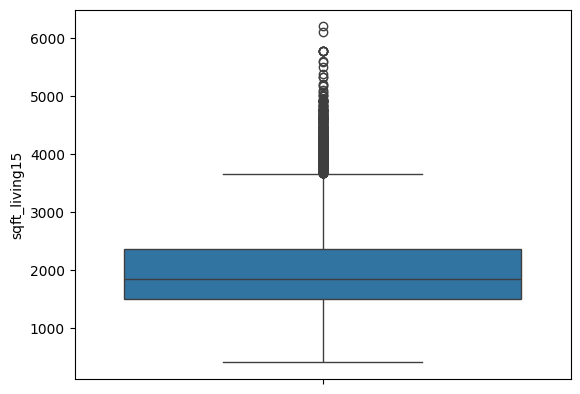

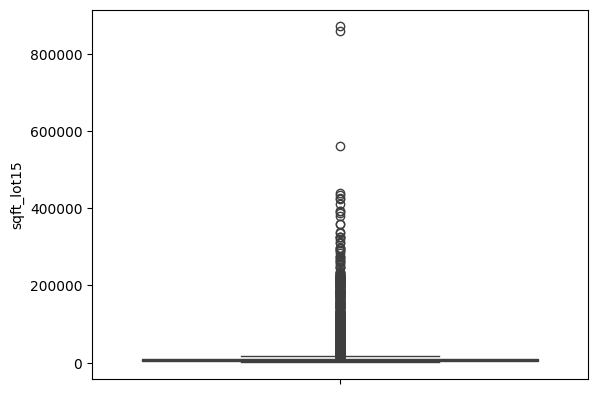

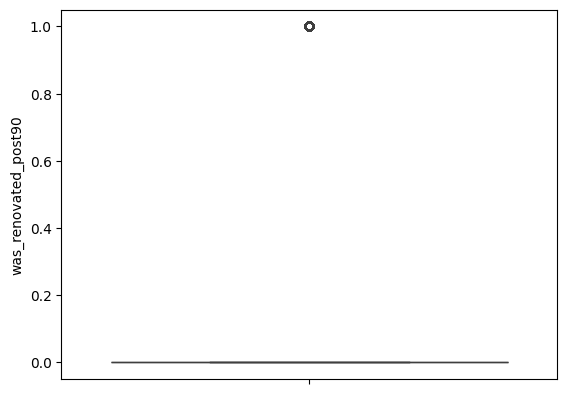

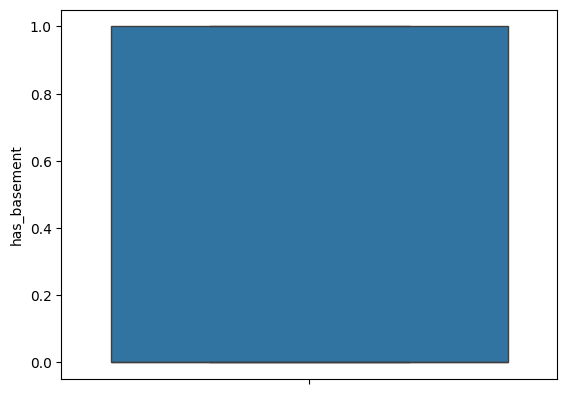

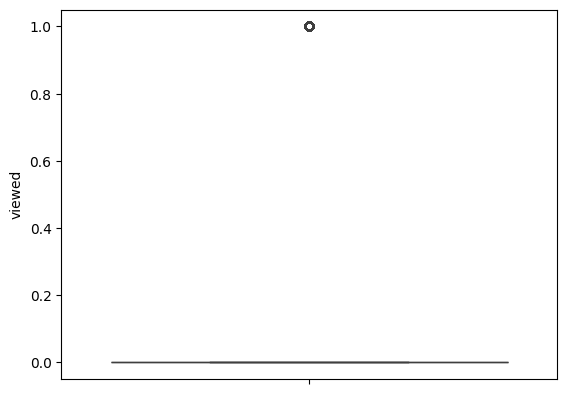

In [498]:
for feature in training_df.columns:
        data=training_df.copy()
        sns.boxplot( data[feature])
        plt.show()

In [499]:
training_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3          1         1180      5650     1.0   
1 2014-12-09  538000.0         3          2         2570      7242     2.0   
2 2015-02-25  180000.0         2          1          770     10000     1.0   
3 2014-12-09  604000.0         4          3         1960      5000     1.0   
4 2015-02-18  510000.0         3          2         1680      8080     1.0   

   waterfront  view  condition  ...      yr_built  yr_renovated  zipcode  \
0           0     0          3  ...  1950_to_1975             0    98178   
1           0     0          3  ...  1950_to_1975          1991    98125   
2           0     0          3  ...       pre1950             0    98028   
3           0     0          5  ...  1950_to_1975             0    98136   
4           0     0          3  ...  1975_to_1997             0    98074   

       lat     long  sqft_living15  sqft_lot15  was_renovated_post90  \
0  47.5112 -122.257           1340        5650                     0   
1  47.7210 -122.319           1690        7639                     1   
2  47.7379 -122.233           2720        8062                     0   
3  47.5208 -122.393           1360        5000                     0   
4  47.6168 -122.045           1800        7503                     0   

   has_basement  viewed  
0             0       0  
1             1       0  
2             0       0  
3             1       0  
4             0       0  

[5 rows x 23 columns]

In [500]:
training_df['bedrooms'].value_counts().sort_values()

11       1
33       1
10       3
9        6
0       13
8       13
7       38
1      199
6      272
5     1601
2     2760
4     6882
3     9824
Name: bedrooms, dtype: int64

In [501]:
# training_df[training_df['bedrooms']==33]
training_df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      1.749734   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.734873    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.000000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...  sqft_basement  yr_renovated       zipcode           lat  \
count  ...   21613.000000  21613.000000  21613.000000  21613.000000   
mean   ...     291.509045     84.402258  98077.939805     47.560053   
std    ...     442.575043    401.679240     53.505026      0.138564   
min    ...       0.000000      0.000000  98001.000000     47.155900   
25%    ...       0.000000      0.000000  98033.000000     47.471000   
50%    ...       0.000000      0.000000  98065.000000     47.571800   
75%    ...     560.000000      0.000000  98118.000000     47.678000   
max    ...    4820.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  was_renovated_post90  \
count  21613.000000   21613.000000   21613.000000          21613.000000   
mean    -122.213896    1986.552492   12768.455652              0.028455   
std        0.140828     685.391304   27304.179631              0.166273   
min     -122.519000     399.000000     651.000000              0.000000   
25%     -122.328000    1490.000000    5100.000000              0.000000   
50%     -122.230000    1840.000000    7620.000000              0.000000   
75%     -122.125000    2360.000000   10083.000000              0.000000   
max     -121.315000    6210.000000  871200.000000              1.000000   

       has_basement        viewed  
count  21613.000000  21613.000000  
mean       0.392680      0.098274  
std        0.488358      0.297692  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 21 columns]

In [502]:
# Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15','price']
    
    for variable in variables:
       
        q1 = df[variable].quantile(0.25)
        q3 = df[variable].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        
        lower_limit=max(lower_limit,df[variable].min())
        upper_limit=min(upper_limit,df[variable].max())

#     # Remove outliers for the current feature
        df = df[(df[variable] >= lower_limit) & (df[variable] <= upper_limit)]

        
    return df


In [503]:
training_df=remove_outliers(training_df)

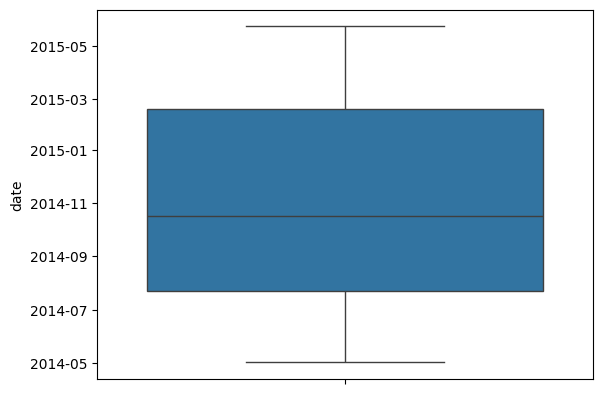

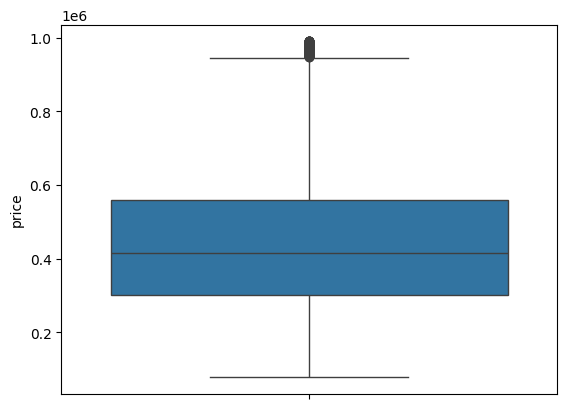

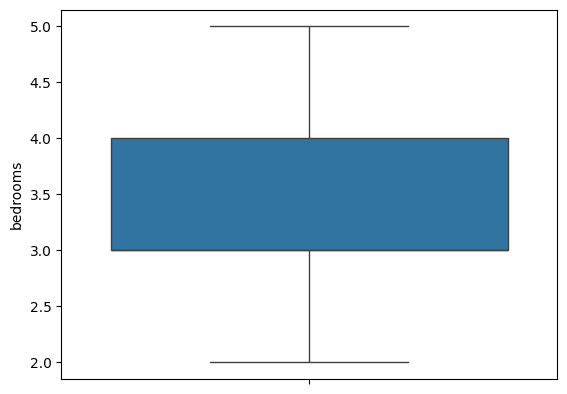

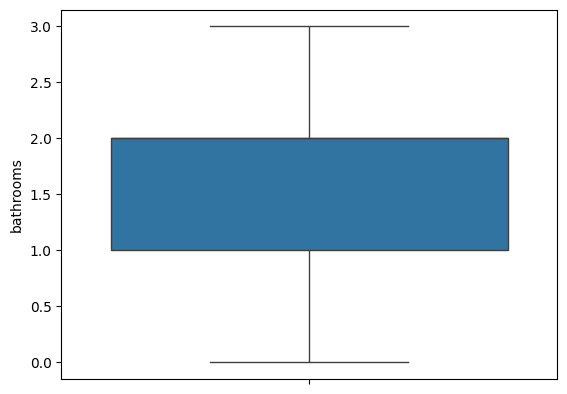

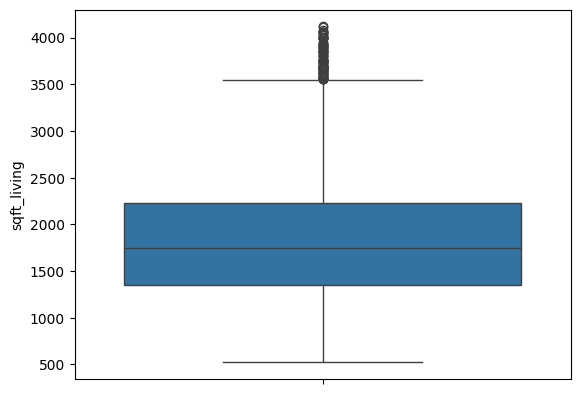

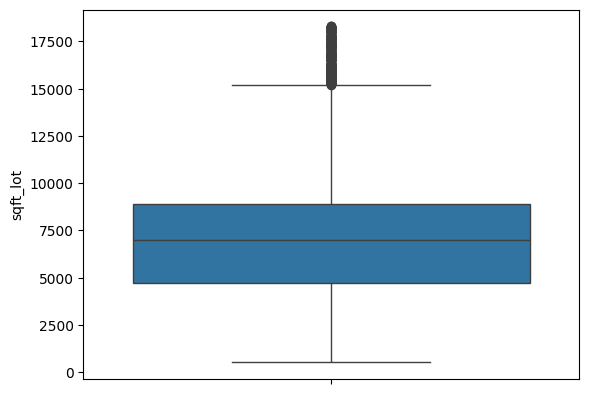

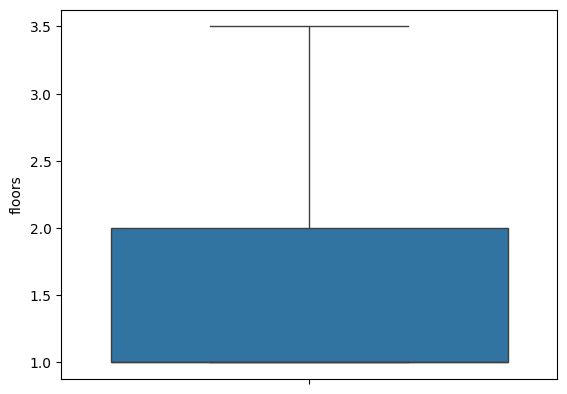

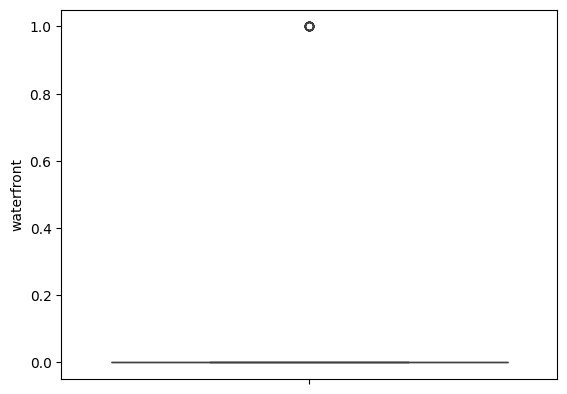

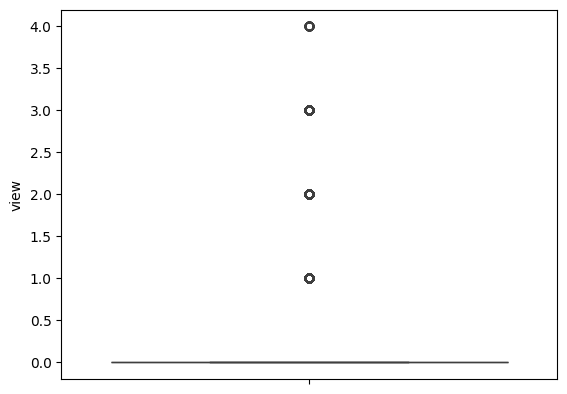

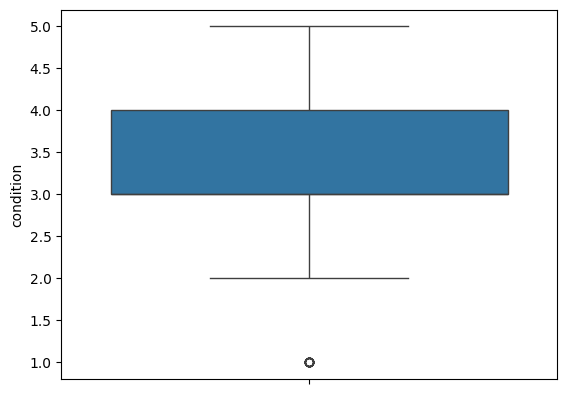

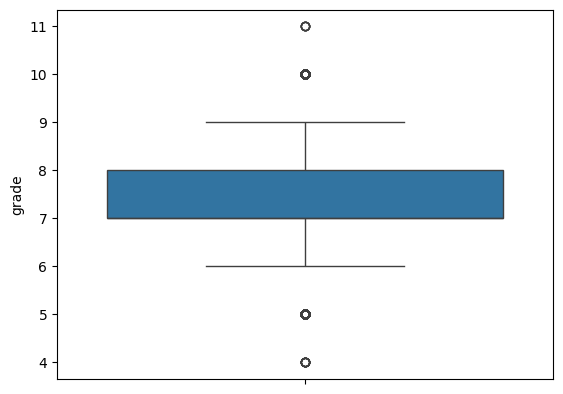

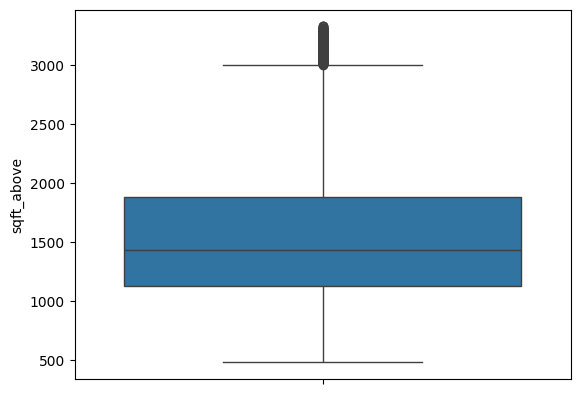

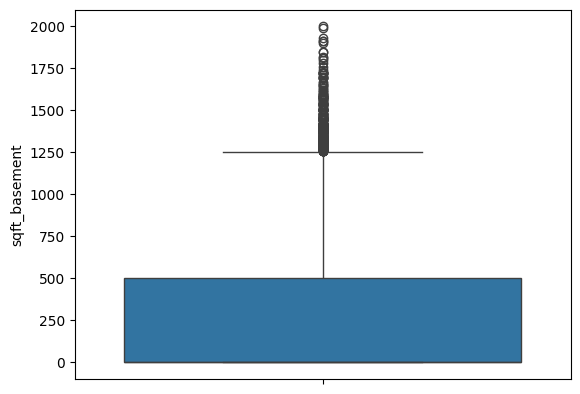

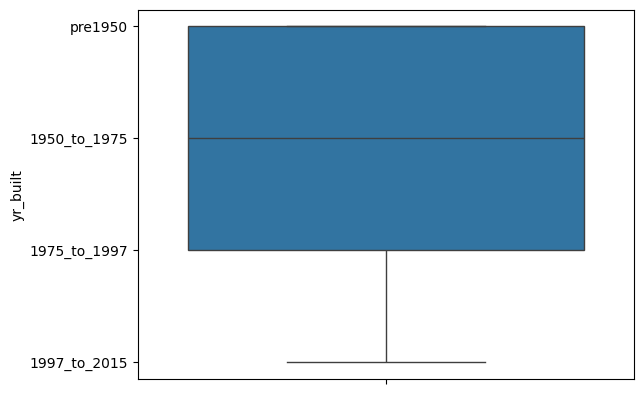

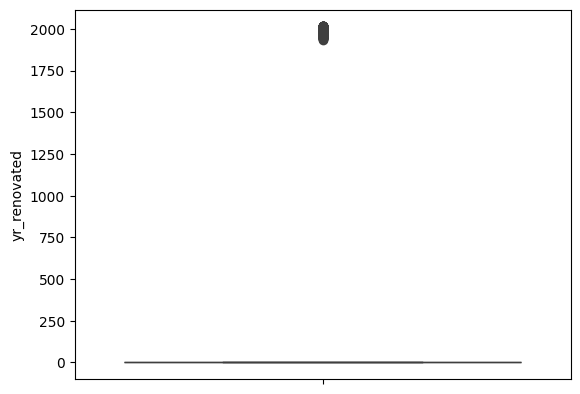

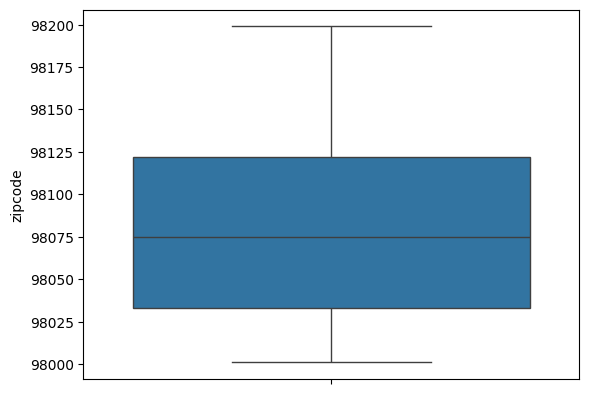

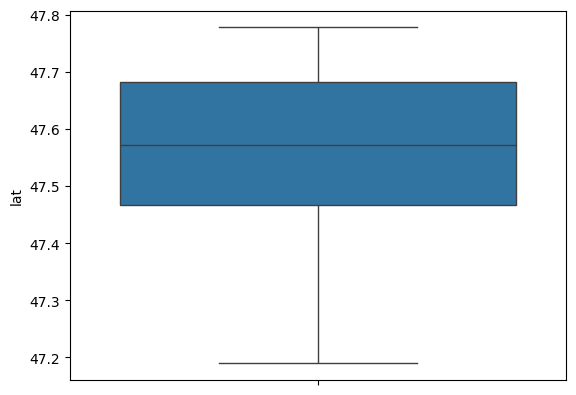

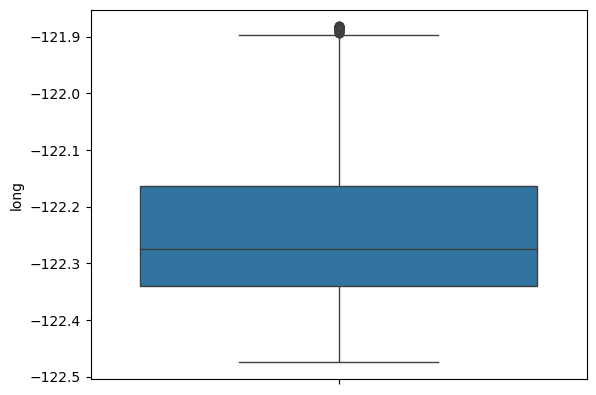

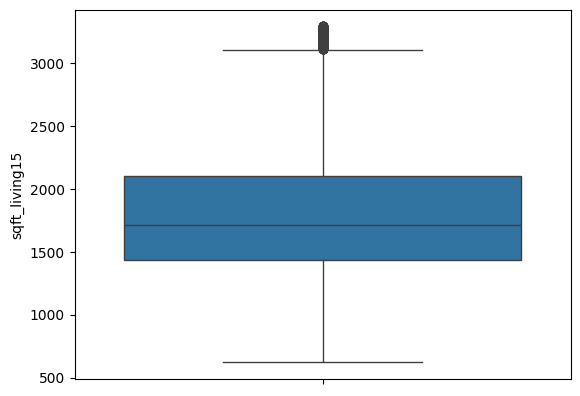

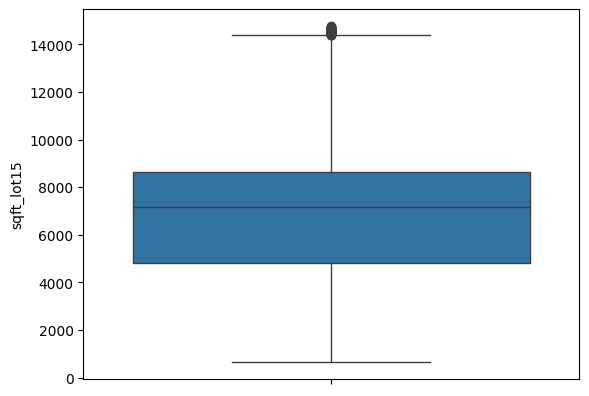

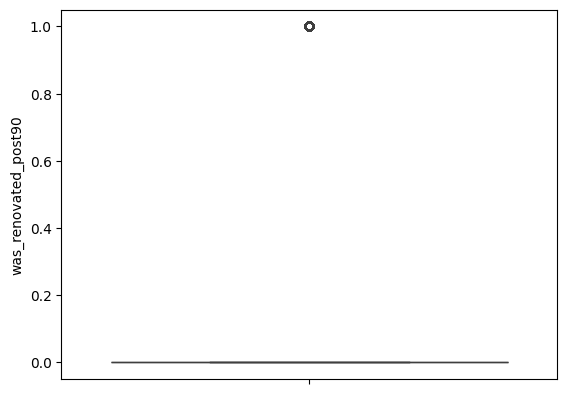

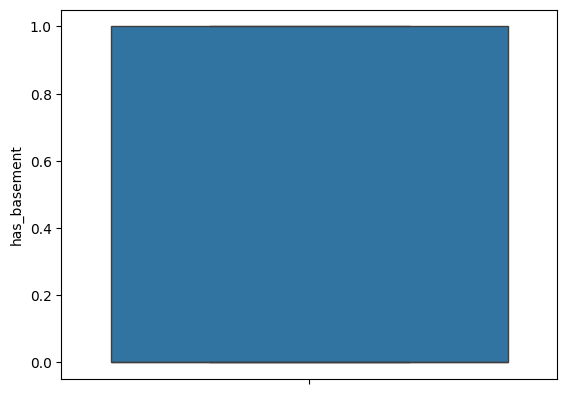

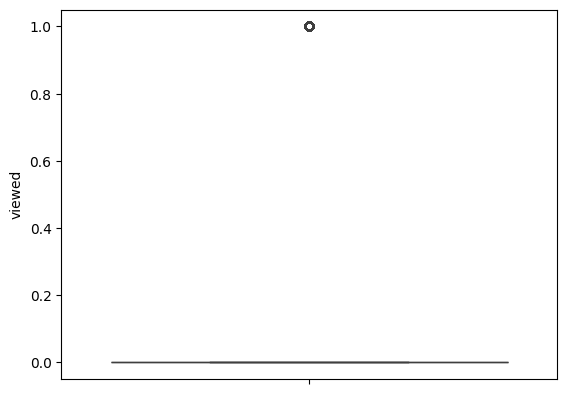

In [504]:
for feature in training_df.columns:
        data=training_df.copy()
        sns.boxplot( data[feature])
        plt.show()

In [505]:
#investgate the price columns
training_df['price'].describe().round(3)

count     16194.000
mean     446891.245
std      183935.123
min       78000.000
25%      302125.000
50%      415000.000
75%      560000.000
max      990400.000
Name: price, dtype: float64

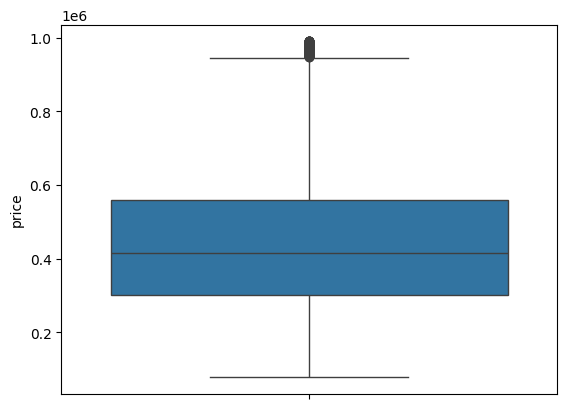

In [506]:
#price distributon
#  View price distribution
sns.boxplot(training_df['price'])

plt.show()

In [507]:
training_df.shape
#outlier ahs been removed

(16194, 23)

# Q1: Location


Location is key when it comes to real estate. Our first question seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.

As a starting point, let us create a scatterplot using latitude and longitude features

# bivariate analysis

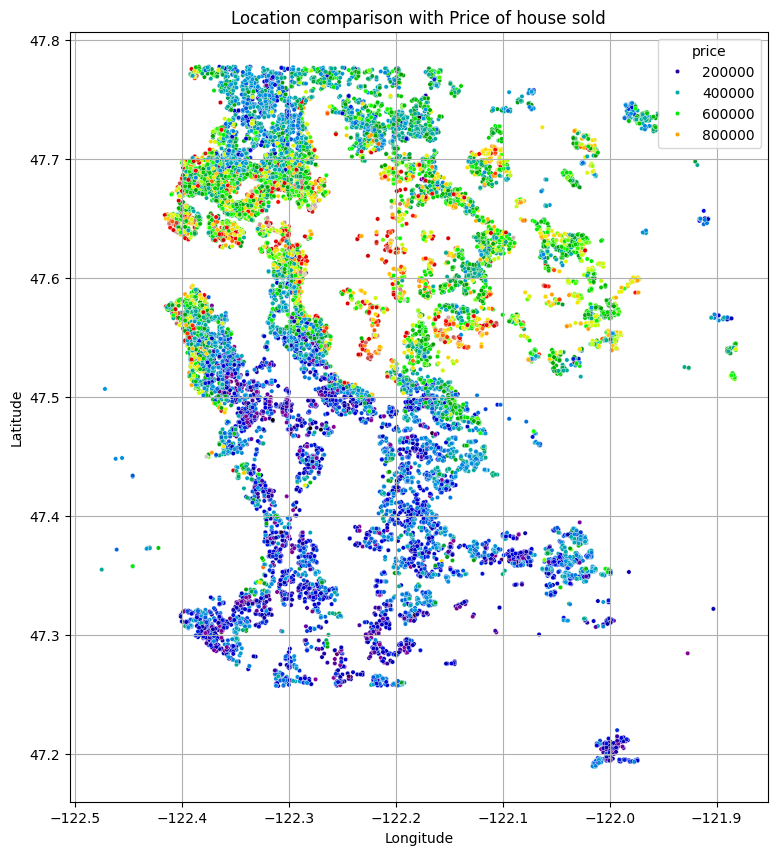

In [508]:
    plt.figure(figsize=(9,10))
    sns.scatterplot(x=training_df["long"],y=training_df["lat"],hue=training_df["price"],  palette = 'nipy_spectral',s=10)
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")  
    plt.title("Location comparison with Price of house sold")
    plt.grid()
    
    plt.show()

observation:This give the information about the huse sold in specific area

Map of house sales


In [509]:
# training_df_location=training_df.copy()
# Define coord as tuple (lat,long)
training_df['coord'] = list(zip(training_df['lat'], training_df['long']))

# House prices per Zipcode


In [510]:
# Explore zipcode
training_df['zipcode'].value_counts()


98103    552
98115    530
98117    510
98133    476
98034    475
        ... 
98077     26
98024     20
98014     16
98070     14
98039      5
Name: zipcode, Length: 69, dtype: int64

In [511]:
# # Load geojson file
# geodatafilename = 'Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.geojson'
# gdf = gpd.read_file(geodatafilename)
# gdf[:3]

In [512]:
training_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3          1         1180      5650     1.0   
1 2014-12-09  538000.0         3          2         2570      7242     2.0   
2 2015-02-25  180000.0         2          1          770     10000     1.0   
3 2014-12-09  604000.0         4          3         1960      5000     1.0   
4 2015-02-18  510000.0         3          2         1680      8080     1.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0           0     0          3  ...             0    98178  47.5112 -122.257   
1           0     0          3  ...          1991    98125  47.7210 -122.319   
2           0     0          3  ...             0    98028  47.7379 -122.233   
3           0     0          5  ...             0    98136  47.5208 -122.393   
4           0     0          3  ...             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  was_renovated_post90  has_basement  viewed  \
0           1340        5650                     0             0       0   
1           1690        7639                     1             1       0   
2           2720        8062                     0             0       0   
3           1360        5000                     0             1       0   
4           1800        7503                     0             0       0   

                 coord  
0  (47.5112, -122.257)  
1   (47.721, -122.319)  
2  (47.7379, -122.233)  
3  (47.5208, -122.393)  
4  (47.6168, -122.045)  

[5 rows x 24 columns]

In [513]:
training_df["zipcode"]

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 16194, dtype: int64

In [514]:
group=training_df.groupby(['zipcode','price'])
group.first()

date  bedrooms  bathrooms  sqft_living  sqft_lot  \
zipcode price                                                             
98001   110000.0 2015-03-11         2          1          828      4524   
        115000.0 2014-12-05         2          1         1000     16524   
        124500.0 2015-03-26         2          1          840      6480   
        132500.0 2014-05-23         3          1         1080     10500   
        150000.0 2014-06-26         3          1         1310      9612   
...                     ...       ...        ...          ...       ...   
98199   976000.0 2014-08-25         4          1         3120      7680   
        978500.0 2015-04-29         3          2         2060      7080   
        979700.0 2014-10-13         4          2         2480      6000   
        980000.0 2014-05-23         4          3         3680      5854   
        990000.0 2015-04-23         4          2         2540      5930   

                  floors  waterfront  view  condition  grade  ...  \
zipcode price                                                 ...   
98001   110000.0     1.0           0     0          3      6  ...   
        115000.0     1.0           0     0          3      5  ...   
        124500.0     1.0           0     0          4      5  ...   
        132500.0     1.0           0     0          3      7  ...   
        150000.0     1.0           0     0          3      7  ...   
...                  ...         ...   ...        ...    ...  ...   
98199   976000.0     1.0           0     3          3      8  ...   
        978500.0     2.0           0     0          3      9  ...   
        979700.0     2.0           0     2          3     10  ...   
        980000.0     1.0           0     3          3     10  ...   
        990000.0     2.0           0     0          3      9  ...   

                      yr_built  yr_renovated      lat     long  sqft_living15  \
zipcode price                                                                   
98001   110000.0  1950_to_1975          2007  47.2655 -122.244            828   
        115000.0       pre1950             0  47.2841 -122.255           1350   
        124500.0  1950_to_1975             0  47.2640 -122.258           1100   
        132500.0  1950_to_1975             0  47.3200 -122.278           1200   
        150000.0  1950_to_1975             0  47.2958 -122.285           1310   
...                        ...           ...      ...      ...            ...   
98199   976000.0  1950_to_1975             0  47.6460 -122.390           2900   
        978500.0       pre1950             0  47.6455 -122.409           3070   
        979700.0       pre1950             0  47.6392 -122.406           3030   
        980000.0  1950_to_1975             0  47.6327 -122.395           3140   
        990000.0  1997_to_2015             0  47.6451 -122.387           1400   

                  sqft_lot15  was_renovated_post90  has_basement  viewed  \
zipcode price                                                              
98001   110000.0        5402                     1             0       0   
        115000.0       10208                     0             0       0   
        124500.0        7300                     0             0       0   
        132500.0        9607                     0             0       0   
        150000.0        9812                     0             1       0   
...                      ...                   ...           ...     ...   
98199   976000.0        7680                     0             1       1   
        978500.0        7500                     0             1       0   
        979700.0        5600                     0             1       1   
        980000.0        5000                     0             1       1   
        990000.0        4000                     0             0       0   

                                coord  
zipcode price                          
98001   110000.0  (47.2655

In [515]:
# Extract price and zipcode from our dataset
dzip = training_df[['zipcode', 'price']]

# Groupby zipcode and take median price
dzip= dzip.groupby(dzip['zipcode']).median()
dzip.reset_index()

zipcode     price
0     98001  256000.0
1     98002  233750.0
2     98003  261000.0
3     98004  800000.0
4     98005  690000.0
..      ...       ...
64    98177  491325.0
65    98178  272000.0
66    98188  259250.0
67    98198  258000.0
68    98199  608000.0

[69 rows x 2 columns]

# Location of most expensive houses


In [516]:
training_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3          1         1180      5650     1.0   
1 2014-12-09  538000.0         3          2         2570      7242     2.0   
2 2015-02-25  180000.0         2          1          770     10000     1.0   
3 2014-12-09  604000.0         4          3         1960      5000     1.0   
4 2015-02-18  510000.0         3          2         1680      8080     1.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0           0     0          3  ...             0    98178  47.5112 -122.257   
1           0     0          3  ...          1991    98125  47.7210 -122.319   
2           0     0          3  ...             0    98028  47.7379 -122.233   
3           0     0          5  ...             0    98136  47.5208 -122.393   
4           0     0          3  ...             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  was_renovated_post90  has_basement  viewed  \
0           1340        5650                     0             0       0   
1           1690        7639                     1             1       0   
2           2720        8062                     0             0       0   
3           1360        5000                     0             1       0   
4           1800        7503                     0             0       0   

                 coord  
0  (47.5112, -122.257)  
1   (47.721, -122.319)  
2  (47.7379, -122.233)  
3  (47.5208, -122.393)  
4  (47.6168, -122.045)  

[5 rows x 24 columns]

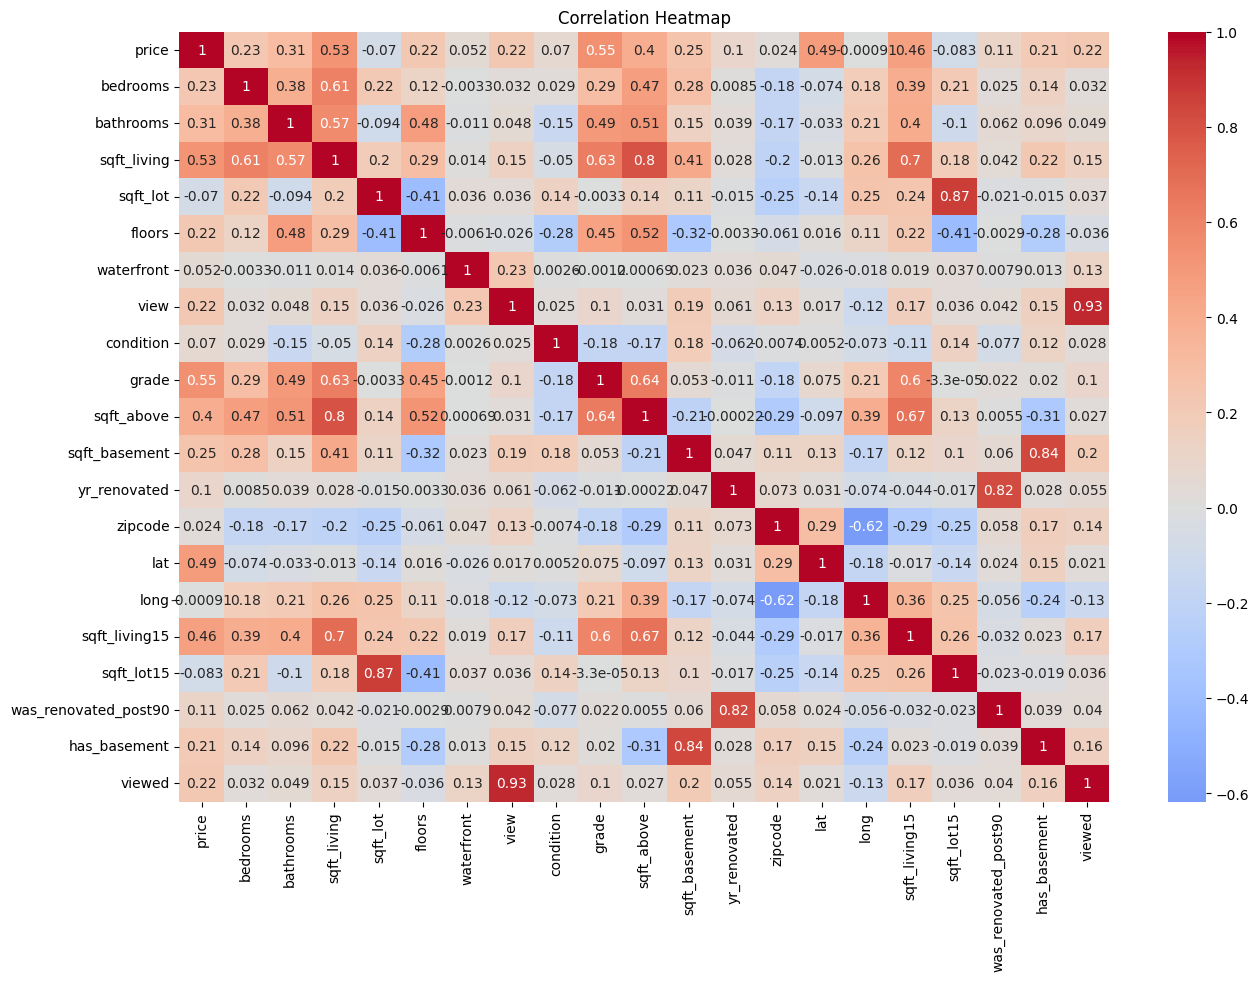

In [517]:
# Correlation matrix
corr = training_df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [518]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df

In [519]:
drop_corrfeats(training_df)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3          1         1180      5650   
1     2014-12-09  538000.0         3          2         2570      7242   
2     2015-02-25  180000.0         2          1          770     10000   
3     2014-12-09  604000.0         4          3         1960      5000   
4     2015-02-18  510000.0         3          2         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3          2         1530      1131   
21609 2015-02-23  400000.0         4          2         2310      5813   
21610 2014-06-23  402101.0         2          0         1020      1350   
21611 2015-01-16  400000.0         3          2         1600      2388   
21612 2014-10-15  325000.0         2          0         1020      1076   

       floors  waterfront  view  condition  ...  sqft_basement      yr_built  \
0         1.0           0     0          3  ...              0  1950_to_1975   
1         2.0           0     0          3  ...            400  1950_to_1975   
2         1.0           0     0          3  ...              0       pre1950   
3         1.0           0     0          5  ...            910  1950_to_1975   
4         1.0           0     0          3  ...              0  1975_to_1997   
...       ...         ...   ...        ...  ...            ...           ...   
21608     3.0           0     0          3  ...              0  1997_to_2015   
21609     2.0           0     0          3  ...              0  1997_to_2015   
21610     2.0           0     0          3  ...              0  1997_to_2015   
21611     2.0           0     0          3  ...              0  1997_to_2015   
21612     2.0           0     0          3  ...              0  1997_to_2015   

      yr_renovated  zipcode      lat     long  was_renovated_post90  \
0                0    98178  47.5112 -122.257                     0   
1             1991    98125  47.7210 -122.319                     1   
2                0    98028  47.7379 -122.233                     0   
3                0    98136  47.5208 -122.393                     0   
4                0    98074  47.6168 -122.045                     0   
...            ...      ...      ...      ...                   ...   
21608            0    98103  47.6993 -122.346                     0   
21609            0    98146  47.5107 -122.362                     0   
21610            0    98144  47.5944 -122.299                     0   
21611            0    98027  47.5345 -122.069                     0   
21612            0    98144  47.5941 -122.299                     0   

       has_basement  viewed                coord  
0                 0       0  (47.5112, -122.257)  
1                 1       0   (47.721, -122.319)  
2                 0       0  (47.7379, -122.233)  
3                 1       0  (47.5208, -122.393)  
4                 0       0  (47.6168, -122.045)  
...             ...     ...                  ...  
21608             0       0  (47.6993, -122.346)  
21609             0       0  (47.5107, -122.362)  
21610             0       0  (47.5944, -122.299)  
21611             0       0  (47.5345, -122.069)  
21612             0       0  (47.5941, -122.299)  

[16194 rows x 21 columns]

In [520]:
# Save a csv copy
training_df.to_csv('dfcleaned.csv')


In [521]:
training_df.shape

(16194, 24)

In [522]:
# One-hot encoding
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df


# Waterfront Feature

In [523]:
training_df=training_df.drop(['view'],axis=1)

In [524]:
training_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3          1         1180      5650     1.0   
1 2014-12-09  538000.0         3          2         2570      7242     2.0   
2 2015-02-25  180000.0         2          1          770     10000     1.0   
3 2014-12-09  604000.0         4          3         1960      5000     1.0   
4 2015-02-18  510000.0         3          2         1680      8080     1.0   

   waterfront  condition  grade  ...  yr_renovated  zipcode      lat     long  \
0           0          3      7  ...             0    98178  47.5112 -122.257   
1           0          3      7  ...          1991    98125  47.7210 -122.319   
2           0          3      6  ...             0    98028  47.7379 -122.233   
3           0          5      7  ...             0    98136  47.5208 -122.393   
4           0          3      8  ...             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  was_renovated_post90  has_basement  viewed  \
0           1340        5650                     0             0       0   
1           1690        7639                     1             1       0   
2           2720        8062                     0             0       0   
3           1360        5000                     0             1       0   
4           1800        7503                     0             0       0   

                 coord  
0  (47.5112, -122.257)  
1   (47.721, -122.319)  
2  (47.7379, -122.233)  
3  (47.5208, -122.393)  
4  (47.6168, -122.045)  

[5 rows x 23 columns]

# Q2: House attributes
Let us now investigate house features to determine which ones have the biggest impact on price. This will help shape our approach to predictive modelling and also give stakeholders a sense of which type of houses to focus on.



In [525]:
training_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'was_renovated_post90', 'has_basement',
       'viewed', 'coord'],
      dtype='object')

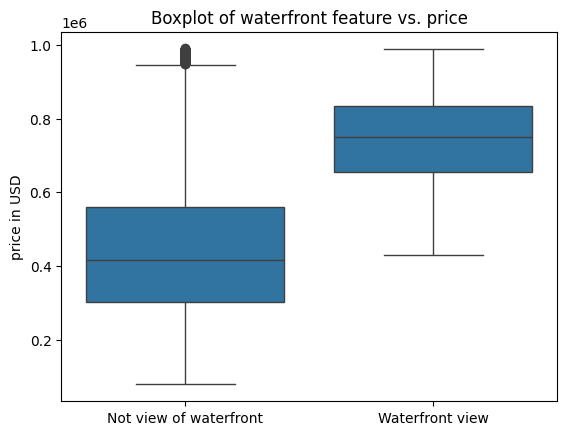

In [526]:
# Plot boxplot of waterfront feature
sns.boxplot(x = training_df['waterfront'], y = training_df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [527]:
price_for_waterfront=round(training_df[training_df["waterfront"]==1]["price"].mean(),3)
price_for_not_waterfront=round(training_df[training_df["waterfront"]==0]["price"].mean(),3)
print(f'for waterfront={price_for_waterfront}')
print(f'for waterfront not={price_for_not_waterfront}')




for waterfront=743090.706
for waterfront not=446579.977


# Q3: House attributes
Let us now investigate house features to determine which ones have the biggest impact on price. This will help shape our approach to predictive modelling and also give stakeholders a sense of which type of houses to focus on.

In [528]:
# Create a copy of df to manipulate
house_attr = training_df.copy()


In [529]:
training_df['bedrooms'].unique

<bound method Series.unique of 0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 16194, dtype: int64>

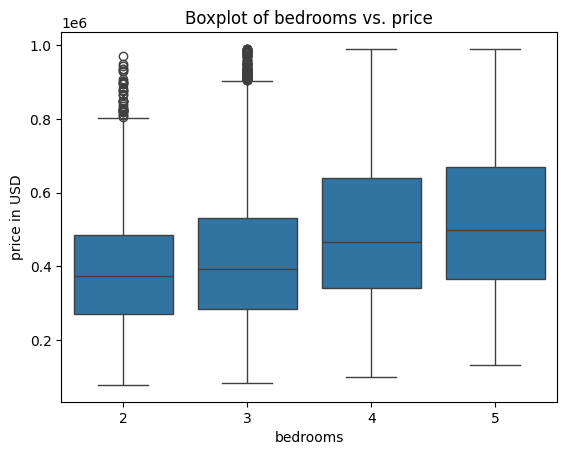

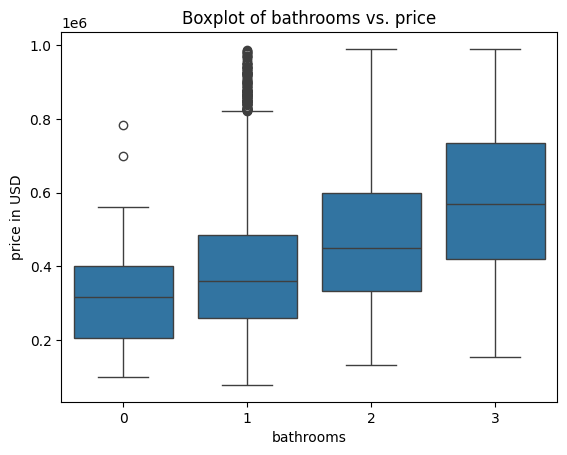

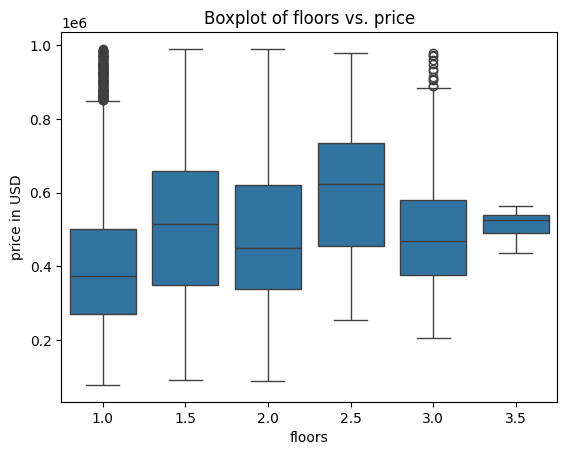

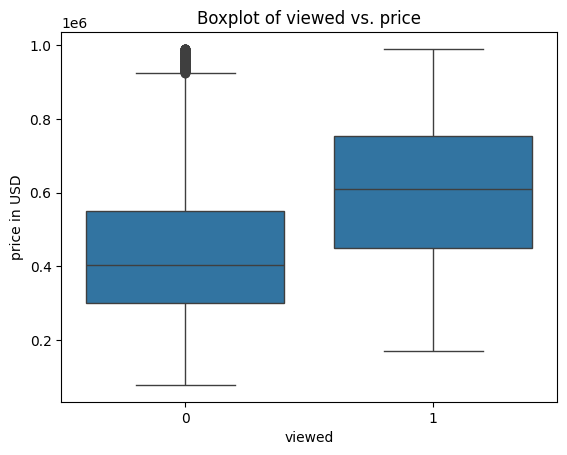

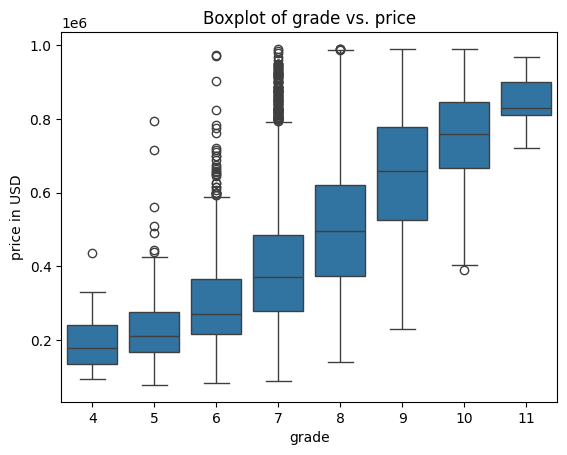

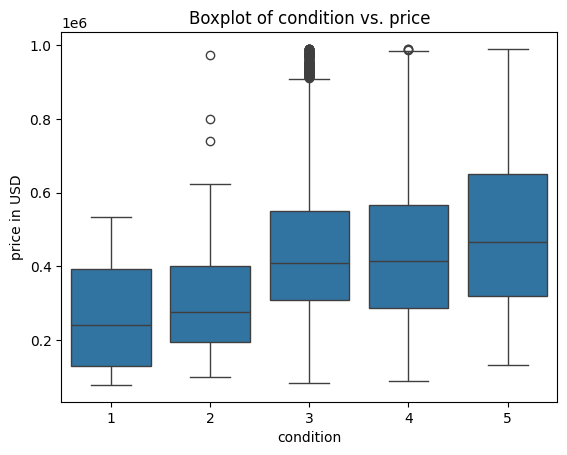

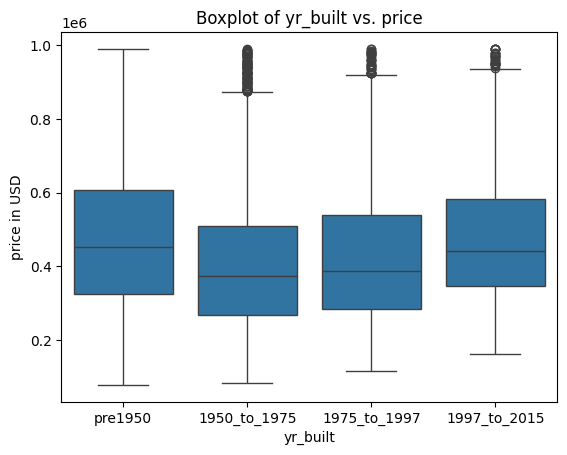

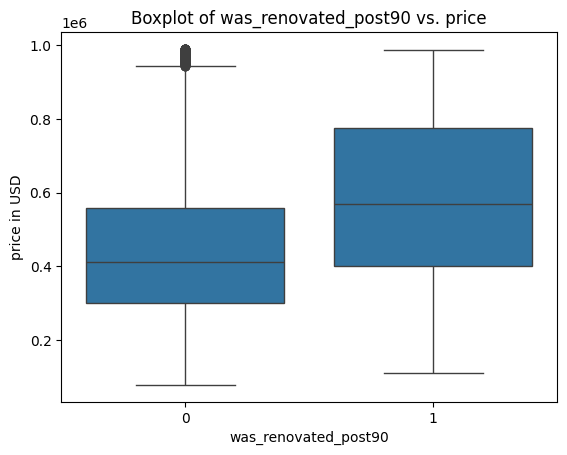

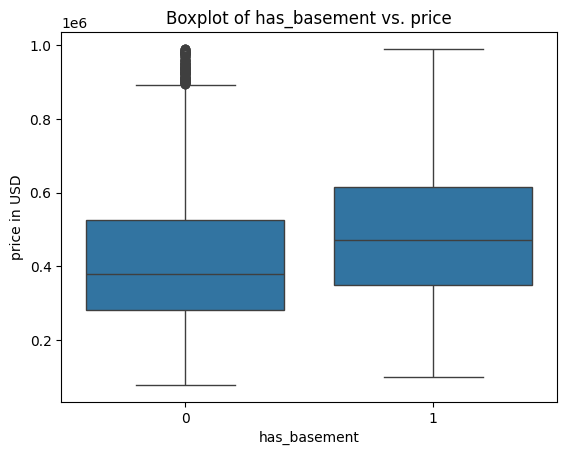

In [530]:
# Define categorical variables
catfeats = ['bedrooms', 'bathrooms', 'floors', 'viewed', 'grade', 'condition', 
            'yr_built', 'was_renovated_post90', 'has_basement']




# Plot boxplots
for feature in (catfeats ):
    sns.boxplot(x = house_attr[feature], y = house_attr['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

 # Exploring bedroom count 

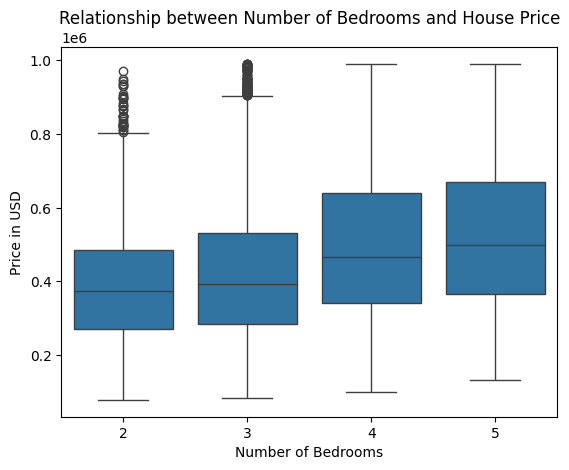

In [531]:
sns.boxplot(x = training_df['bedrooms'], y = training_df['price'], data = training_df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in USD')
plt.title('Relationship between Number of Bedrooms and House Price')
plt.show()


#Let us examine whether increasing bedroom count always leads to an increase in price. In particular let's look at the mean living square-footage and look at bedroom count for houses within 0.1 standard deviation of this mea

In [532]:
training_df_val= training_df[abs(training_df['sqft_living']-training_df['sqft_living'].mean()) < 0.1*training_df['sqft_living'].std()]


In [533]:
training_df_val["sqft_living"].describe()

count    1223.000000
mean     1818.115290
std        36.461745
min      1760.000000
25%      1790.000000
50%      1820.000000
75%      1850.000000
max      1880.000000
Name: sqft_living, dtype: float64

We are looking at 1,282 houses with living space between 1890 and 2034 sqft.

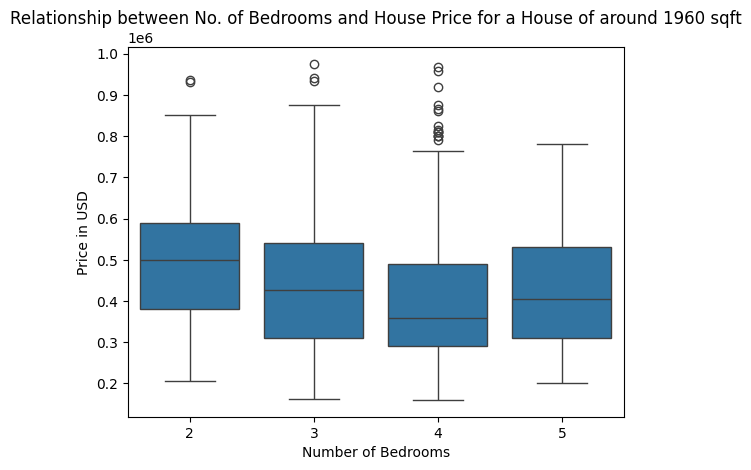

In [534]:
sns.boxplot(x = training_df_val['bedrooms'], y = training_df_val['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in USD')
plt.title('Relationship between No. of Bedrooms and House Price for a House of around 1960 sqft')
plt.show()

# How important is a large lot?
Let us examine the importance of having a large lot. We will define a ratio of sqft_living over sqft_lot to understand if there is an ideal trade-off between lot size (presumably garden) and living space.

We are looking at 1,282 houses with living space between 1890 and 2034 sqft.

In [535]:
# Define ratio 
training_df_val['living_per_lot']= training_df_val['sqft_living']/training_df_val['sqft_lot']

In [536]:
training_df_val['living_per_lot']

8        0.238286
14       0.373196
59       0.185445
76       0.241096
159      0.157424
           ...   
21428    0.666667
21442    0.352830
21509    0.920523
21549    0.975348
21585    0.374000
Name: living_per_lot, Length: 1223, dtype: float64

In [537]:
training_df_val=training_df_val[training_df_val['living_per_lot']<1]

In [538]:
training_df_val.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8   2015-04-15  229500.0         3          1         1780      7470     1.0   
14  2015-03-12  530000.0         5          2         1810      4850     1.5   
59  2015-02-23  430000.0         4          3         1850      9976     2.0   
76  2014-10-13  380000.0         4          1         1760      7300     1.0   
159 2014-10-03  320000.0         4          1         1760     11180     1.0   

     waterfront  condition  grade  ...  zipcode      lat     long  \
8             0          3      7  ...    98146  47.5123 -122.337   
14            0          3      7  ...    98107  47.6700 -122.394   
59            0          3      8  ...    98059  47.5059 -122.149   
76            0          3      7  ...    98008  47.6034 -122.125   
159           0          4      8  ...    98059  47.4715 -122.118   

     sqft_living15  sqft_lot15  was_renovated_post90  has_basement  viewed  \
8             1780        8113                     0             1       0   
14            1360        4850                     0             0       0   
59            2270        8542                     0             0       0   
76            1680        7500                     0             1       0   
159           1730       11180                     0             0       0   

                   coord  living_per_lot  
8    (47.5123, -122.337)        0.238286  
14     (47.67, -122.394)        0.373196  
59   (47.5059, -122.149)        0.185445  
76   (47.6034, -122.125)        0.241096  
159  (47.4715, -122.118)        0.157424  

[5 rows x 24 columns]

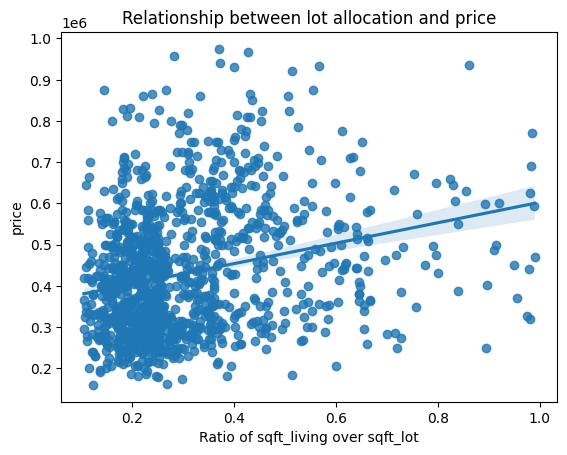

In [539]:
# Regplot of ratio over price
sns.regplot(x = training_df_val['living_per_lot'], y =training_df_val['price'], data = training_df_val)
plt.title('Relationship between lot allocation and price')
plt.xlabel('Ratio of sqft_living over sqft_lot')
plt.show()

# What is building grade and how does it affect price?
Building grade is a feature from King County government and represents the construction quality of improvements. Details were found here and reproduced below. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
4 Generally older, low quality construction. Does not meet code.
5 Low construction costs and workmanship. Small, simple design.
6 Lowest grade currently meeting building code. Low quality materials and simple designs.
7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
9 Better architectural design with extra interior and exterior design and quality.
10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.
Let us investigate the grade distribution in our dataset and see how it correlates with price.

In [540]:
# Get summary statistics
training_df_val['grade'].describe()

count    1178.000000
mean        7.328523
std         0.604333
min         5.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: grade, dtype: float64

In [541]:
training_df_val["grade"]

8        7
14       7
59       8
76       7
159      8
        ..
21428    8
21442    8
21509    9
21549    8
21585    7
Name: grade, Length: 1178, dtype: int64

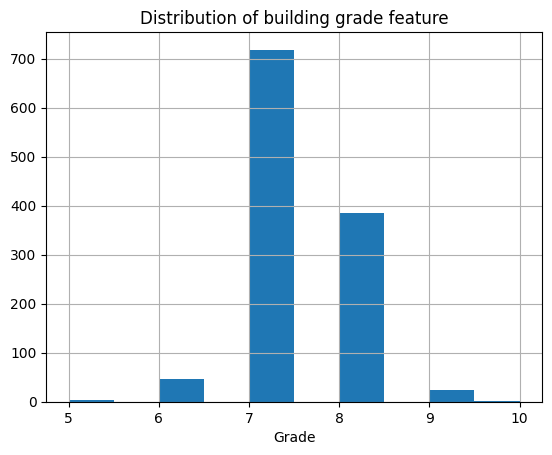

In [542]:
# Plot grade distribution
training_df_val['grade'].hist()
plt.title('Distribution of building grade feature')
plt.xlabel('Grade')
plt.show()

Building grade looks to be normally distributed. It is likely that this was intentional and that there was a desire to have properties match a bell curve.

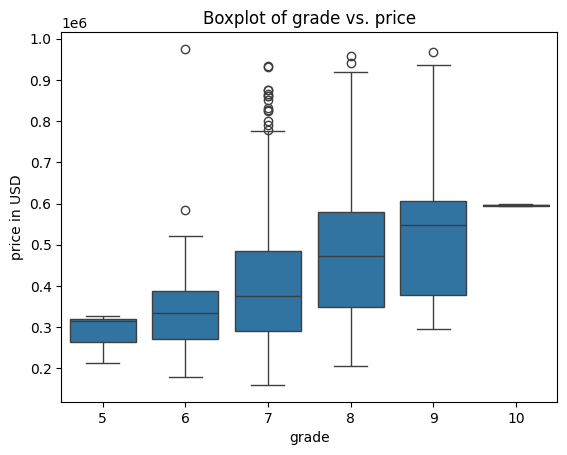

In [543]:
sns.boxplot(x = training_df_val['grade'], y = training_df_val['price'])
plt.title("Boxplot of grade vs. price")
plt.ylabel("price in USD")
plt.xlabel("grade")
plt.show()

The median house price increases with grade indicating that these features are positively correlated. We suspect grade will be a good indicator of price.

The median house price increases with grade indicating that these features are positively correlated. We suspect grade will be a good indicator of price.

Let us look at how sqft_living and grade relate to price by doing a scatterplot and using the hue option.

In [544]:
training_df_val['sqft_living']=training_df_val['sqft_living'].sort_values()

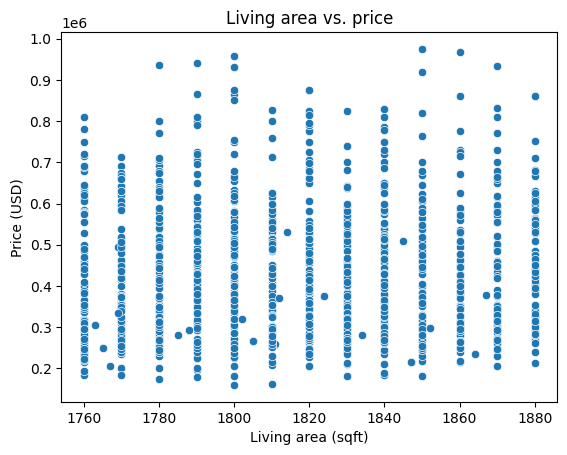

In [545]:
# Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = training_df_val['sqft_living'], y = training_df_val['price'], data =training_df_val)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [546]:
X['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

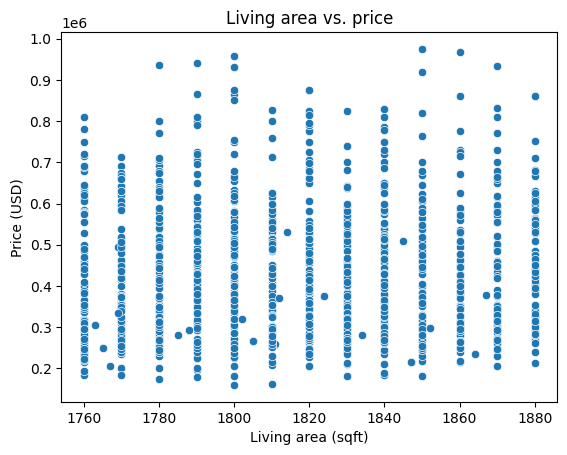

In [547]:
# Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = X['sqft_living'], y =training_df_val['price'], data =X)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

# Conclusion
We would advise targetting the campaign towards houses with a higher bedroom count. However for a given house depending on its square-footage, note that adding an additional bedroom does not necessarily result in a a sale price increase.
There does not appear to be a clear relationship between the ratio sqft_living/sqft_lot and price. This indicates that there is unlikely to be an idea area to allocate to living space within a plot.
The median house price increases with grade indicating that these features are positively correlated. We suspect grade will be a good indicator of price.
For the campaign we would recommend looking at houses with a grade of 10 or above.

# Q3: Time

In [548]:
# date_df=training_df_val['date']
# month=pd.DatetimeIndex(date_df).month
training_df_val['sales_month']=pd.DatetimeIndex(training_df_val['date']).month


In [549]:
training_df_val

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8     2015-04-15  229500.0         3          1         1780      7470   
14    2015-03-12  530000.0         5          2         1810      4850   
59    2015-02-23  430000.0         4          3         1850      9976   
76    2014-10-13  380000.0         4          1         1760      7300   
159   2014-10-03  320000.0         4          1         1760     11180   
...          ...       ...       ...        ...          ...       ...   
21428 2014-06-09  365000.0         3          2         1800      2700   
21442 2014-11-05  580000.0         3          2         1870      5300   
21509 2014-08-18  600000.0         2          2         1830      1988   
21549 2014-12-31  327500.0         3          2         1820      1866   
21585 2014-08-28  270000.0         3          2         1870      5000   

       floors  waterfront  condition  grade  ...      lat     long  \
8         1.0           0          3      7  ...  47.5123 -122.337   
14        1.5           0          3      7  ...  47.6700 -122.394   
59        2.0           0          3      8  ...  47.5059 -122.149   
76        1.0           0          3      7  ...  47.6034 -122.125   
159       1.0           0          4      8  ...  47.4715 -122.118   
...       ...         ...        ...    ...  ...      ...      ...   
21428     2.0           0          3      8  ...  47.5458 -122.369   
21442     1.0           0          3      8  ...  47.7106 -122.020   
21509     2.0           0          3      9  ...  47.5779 -122.409   
21549     2.0           0          3      8  ...  47.4643 -122.346   
21585     2.0           0          3      7  ...  47.3339 -122.055   

      sqft_living15  sqft_lot15  was_renovated_post90  has_basement  viewed  \
8              1780        8113                     0             1       0   
14             1360        4850                     0             0       0   
59             2270        8542                     0             0       0   
76             1680        7500                     0             1       0   
159            1730       11180                     0             0       0   
...             ...         ...                   ...           ...     ...   
21428          1580        2036                     0             0       0   
21442          1870        5050                     0             0       0   
21509          1800        2467                     0             1       0   
21549          1660        6900                     0             1       0   
21585          2170        5399                     0             0       0   

                     coord  living_per_lot  sales_month  
8      (47.5123, -122.337)        0.238286            4  
14       (47.67, -122.394)        0.373196            3  
59     (47.5059, -122.149)        0.185445            2  
76     (47.6034, -122.125)        0.241096           10  
159    (47.4715, -122.118)        0.157424           10  
...                    ...             ...          ...  
21428  (47.5458, -122.369)        0.666667            6  
21442   (47.7106, -122.02)        0.352830           11  
21509  (47.5779, -122.409)        0.920523            8  
21549  (47.4643, -122.346)        0.975348           12  
21585  (47.3339, -122.055)        0.374000            8  

[1178 rows x 25 columns]

In [550]:
# Define function to determine quarter
def quarter(month):
    ''' Returns quarter in which month falls'''
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter

In [551]:
training_df_val['sales_quarter']=training_df_val['sales_month'].apply(quarter)

In [552]:
training_df_val.drop(['date'],axis=1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8      229500.0         3          1         1780      7470     1.0   
14     530000.0         5          2         1810      4850     1.5   
59     430000.0         4          3         1850      9976     2.0   
76     380000.0         4          1         1760      7300     1.0   
159    320000.0         4          1         1760     11180     1.0   
...         ...       ...        ...          ...       ...     ...   
21428  365000.0         3          2         1800      2700     2.0   
21442  580000.0         3          2         1870      5300     1.0   
21509  600000.0         2          2         1830      1988     2.0   
21549  327500.0         3          2         1820      1866     2.0   
21585  270000.0         3          2         1870      5000     2.0   

       waterfront  condition  grade  sqft_above  ...     long sqft_living15  \
8               0          3      7        1050  ... -122.337          1780   
14              0          3      7        1810  ... -122.394          1360   
59              0          3      8        1850  ... -122.149          2270   
76              0          3      7         880  ... -122.125          1680   
159             0          4      8        1760  ... -122.118          1730   
...           ...        ...    ...         ...  ...      ...           ...   
21428           0          3      8        1800  ... -122.369          1580   
21442           0          3      8        1870  ... -122.020          1870   
21509           0          3      9        1530  ... -122.409          1800   
21549           0          3      8        1570  ... -122.346          1660   
21585           0          3      7        1870  ... -122.055          2170   

       sqft_lot15  was_renovated_post90  has_basement  viewed  \
8            8113                     0             1       0   
14           4850                     0             0       0   
59           8542                     0             0       0   
76           7500                     0             1       0   
159         11180                     0             0       0   
...           ...                   ...           ...     ...   
21428        2036                     0             0       0   
21442        5050                     0             0       0   
21509        2467                     0             1       0   
21549        6900                     0             1       0   
21585        5399                     0             0       0   

                     coord  living_per_lot  sales_month  sales_quarter  
8      (47.5123, -122.337)        0.238286            4             Q2  
14       (47.67, -122.394)        0.373196            3             Q1  
59     (47.5059, -122.149)        0.185445            2             Q1  
76     (47.6034, -122.125)        0.241096           10             Q4  
159    (47.4715, -122.118)        0.157424           10             Q4  
...                    ...             ...          ...            ...  
21428  (47.5458, -122.369)        0.666667            6             Q2  
21442   (47.7106, -122.02)        0.352830           11             Q4  
21509  (47.5779, -122.409)        0.920523            8             Q3  
21549  (47.4643, -122.346)        0.975348           12             Q4  
21585  (47.3339, -122.055)        0.374000            8             Q3  

[1178 rows x 25 columns]

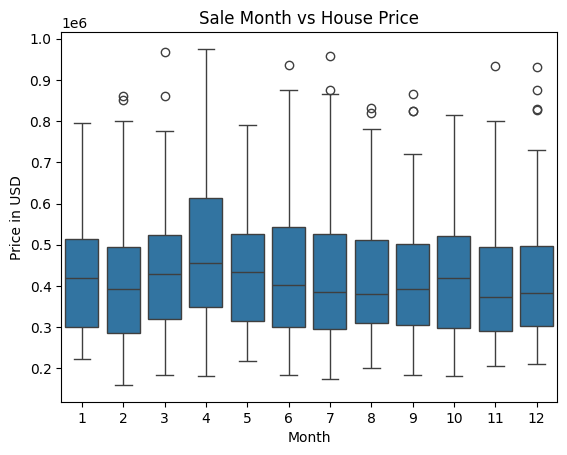

In [553]:
# Plot boxplot of sale month vs price
sns.boxplot(x = training_df_val['sales_month'], y =training_df_val['price'], data = training_df_val)
plt.xlabel('Month')
plt.ylabel('Price in USD')
plt.title('Sale Month vs House Price')
plt.show()

In [554]:
 training_df_val['sales_month'].value_counts

<bound method IndexOpsMixin.value_counts of 8         4
14        3
59        2
76       10
159      10
         ..
21428     6
21442    11
21509     8
21549    12
21585     8
Name: sales_month, Length: 1178, dtype: int64>

There is no apparent pattern here. The median house price does not appear to be affected by the sale month.



In [555]:
training_df_val['sales_quarter']=training_df_val['sales_quarter'].sort_values()

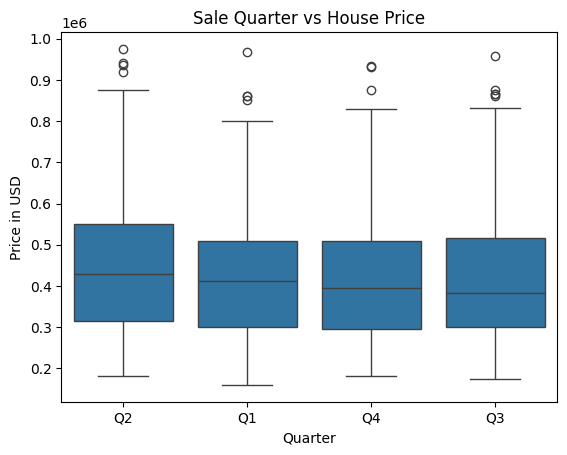

In [556]:
# Plot boxplot of sale quarter vs price
sns.boxplot(x = training_df_val['sales_quarter'], y = training_df_val['price'], data =training_df_val)
plt.xlabel('Quarter')
plt.ylabel('Price in USD')
plt.title('Sale Quarter vs House Price')
plt.show()

The median house sale price is slightly higher in Q2 but barely so. We would imagine that sale quarter has little to no impact on sale price.

In [557]:
training_df_val['sales_month'].value_counts().sort_values()

1      57
2      65
11     85
9      89
12     90
3      98
8      99
10    103
5     115
4     123
6     123
7     131
Name: sales_month, dtype: int64

In [558]:
training_df_val['sales_month'].dtype

dtype('int64')

In [559]:
training_df_val['sales_quarter'].isnull().sum()

0

In [560]:
# sns.countplot(data=training_df_val,x='sales_quarter')
# plt.show()

In [561]:
# # Countplot of sale_quarter
# sns.countplot(x = training_df_val['sales_quarter'])
# plt.title('Frequency of house sales per month')
# plt.xlabel('Quarter')
# plt.ylabel('Count')
# plt.show()

In [562]:
training_df_val

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8     2015-04-15  229500.0         3          1         1780      7470   
14    2015-03-12  530000.0         5          2         1810      4850   
59    2015-02-23  430000.0         4          3         1850      9976   
76    2014-10-13  380000.0         4          1         1760      7300   
159   2014-10-03  320000.0         4          1         1760     11180   
...          ...       ...       ...        ...          ...       ...   
21428 2014-06-09  365000.0         3          2         1800      2700   
21442 2014-11-05  580000.0         3          2         1870      5300   
21509 2014-08-18  600000.0         2          2         1830      1988   
21549 2014-12-31  327500.0         3          2         1820      1866   
21585 2014-08-28  270000.0         3          2         1870      5000   

       floors  waterfront  condition  grade  ...     long  sqft_living15  \
8         1.0           0          3      7  ... -122.337           1780   
14        1.5           0          3      7  ... -122.394           1360   
59        2.0           0          3      8  ... -122.149           2270   
76        1.0           0          3      7  ... -122.125           1680   
159       1.0           0          4      8  ... -122.118           1730   
...       ...         ...        ...    ...  ...      ...            ...   
21428     2.0           0          3      8  ... -122.369           1580   
21442     1.0           0          3      8  ... -122.020           1870   
21509     2.0           0          3      9  ... -122.409           1800   
21549     2.0           0          3      8  ... -122.346           1660   
21585     2.0           0          3      7  ... -122.055           2170   

      sqft_lot15  was_renovated_post90  has_basement  viewed  \
8           8113                     0             1       0   
14          4850                     0             0       0   
59          8542                     0             0       0   
76          7500                     0             1       0   
159        11180                     0             0       0   
...          ...                   ...           ...     ...   
21428       2036                     0             0       0   
21442       5050                     0             0       0   
21509       2467                     0             1       0   
21549       6900                     0             1       0   
21585       5399                     0             0       0   

                     coord  living_per_lot  sales_month  sales_quarter  
8      (47.5123, -122.337)        0.238286            4             Q2  
14       (47.67, -122.394)        0.373196            3             Q1  
59     (47.5059, -122.149)        0.185445            2             Q1  
76     (47.6034, -122.125)        0.241096           10             Q4  
159    (47.4715, -122.118)        0.157424           10             Q4  
...                    ...             ...          ...            ...  
21428  (47.5458, -122.369)        0.666667            6             Q2  
21442   (47.7106, -122.02)        0.352830           11             Q4  
21509  (47.5779, -122.409)        0.920523            8             Q3  
21549  (47.4643, -122.346)        0.975348           12             Q4  
21585  (47.3339, -122.055)        0.374000            8             Q3  

[1178 rows x 26 columns]

# Preparing data for modelling
We would like to investigate the relationship between our target variable price and the continuous feature variables in our dataset. We will make use of Seaborn's jointplot to simultaneously inspect linearity and distributions.

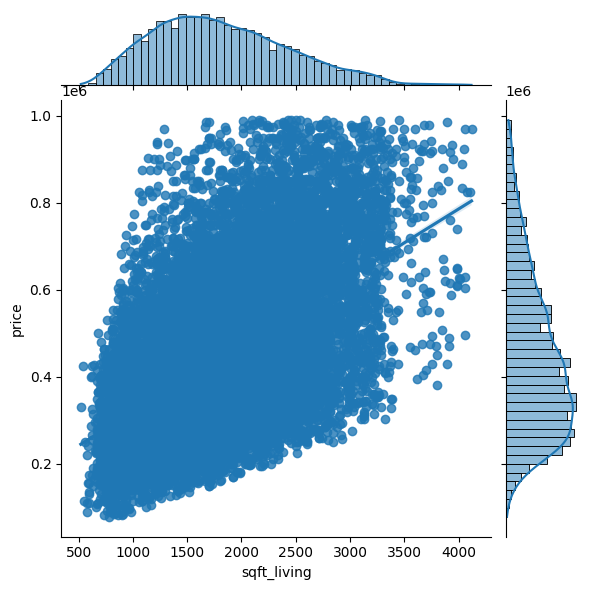

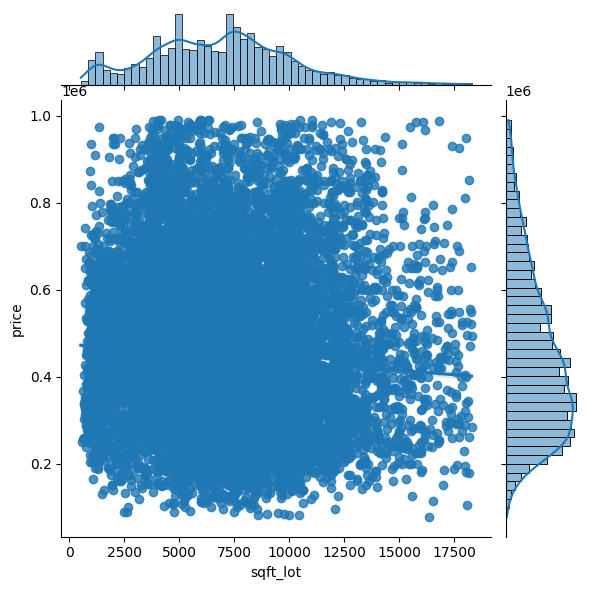

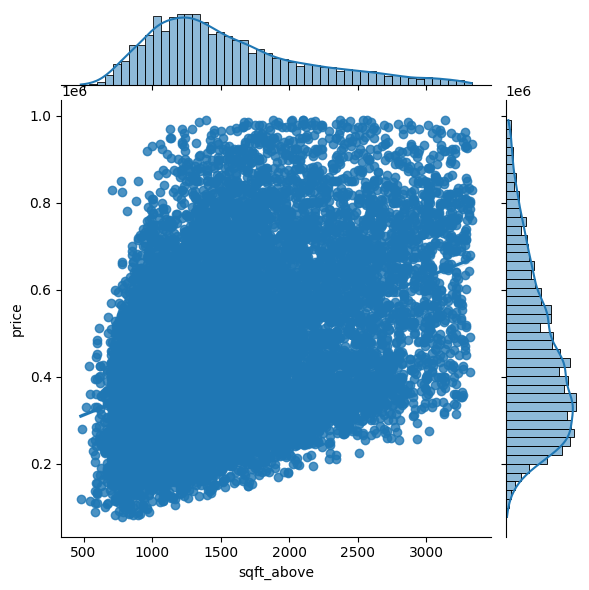

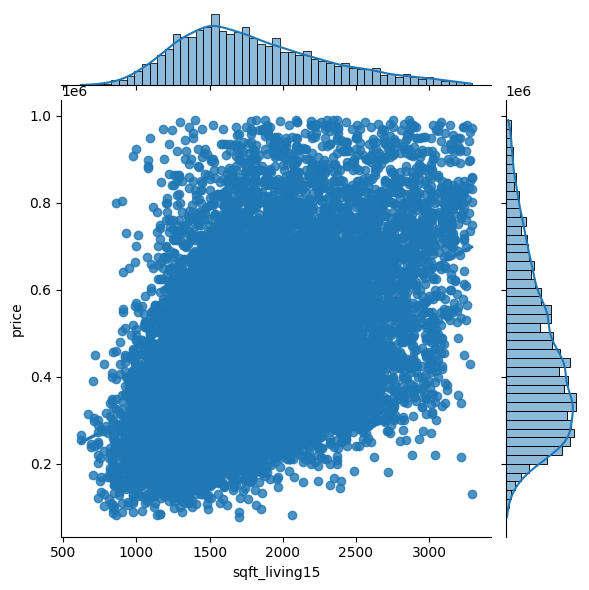

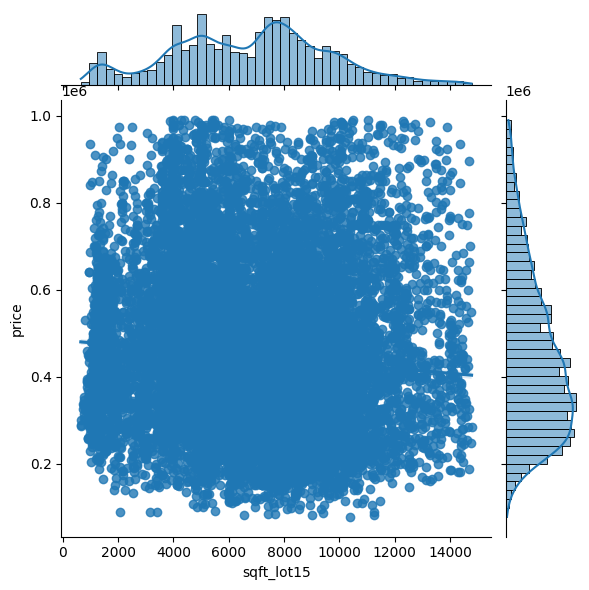

In [563]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = training_df[feature], y = training_df['price'], kind = 'reg')


All features appear somewhat linear. Note that we won't keep all the sqft-type features for our model due to them likely being correlated. This will be explored further in the multicollinearity section below. Note that sqft_living and sqft_above look to be most appropriate due to demonstrating greater linearity with respect to our target feature, whereas sqft_lot is the least linear.



In [564]:
training_df_val

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8     2015-04-15  229500.0         3          1         1780      7470   
14    2015-03-12  530000.0         5          2         1810      4850   
59    2015-02-23  430000.0         4          3         1850      9976   
76    2014-10-13  380000.0         4          1         1760      7300   
159   2014-10-03  320000.0         4          1         1760     11180   
...          ...       ...       ...        ...          ...       ...   
21428 2014-06-09  365000.0         3          2         1800      2700   
21442 2014-11-05  580000.0         3          2         1870      5300   
21509 2014-08-18  600000.0         2          2         1830      1988   
21549 2014-12-31  327500.0         3          2         1820      1866   
21585 2014-08-28  270000.0         3          2         1870      5000   

       floors  waterfront  condition  grade  ...     long  sqft_living15  \
8         1.0           0          3      7  ... -122.337           1780   
14        1.5           0          3      7  ... -122.394           1360   
59        2.0           0          3      8  ... -122.149           2270   
76        1.0           0          3      7  ... -122.125           1680   
159       1.0           0          4      8  ... -122.118           1730   
...       ...         ...        ...    ...  ...      ...            ...   
21428     2.0           0          3      8  ... -122.369           1580   
21442     1.0           0          3      8  ... -122.020           1870   
21509     2.0           0          3      9  ... -122.409           1800   
21549     2.0           0          3      8  ... -122.346           1660   
21585     2.0           0          3      7  ... -122.055           2170   

      sqft_lot15  was_renovated_post90  has_basement  viewed  \
8           8113                     0             1       0   
14          4850                     0             0       0   
59          8542                     0             0       0   
76          7500                     0             1       0   
159        11180                     0             0       0   
...          ...                   ...           ...     ...   
21428       2036                     0             0       0   
21442       5050                     0             0       0   
21509       2467                     0             1       0   
21549       6900                     0             1       0   
21585       5399                     0             0       0   

                     coord  living_per_lot  sales_month  sales_quarter  
8      (47.5123, -122.337)        0.238286            4             Q2  
14       (47.67, -122.394)        0.373196            3             Q1  
59     (47.5059, -122.149)        0.185445            2             Q1  
76     (47.6034, -122.125)        0.241096           10             Q4  
159    (47.4715, -122.118)        0.157424           10             Q4  
...                    ...             ...          ...            ...  
21428  (47.5458, -122.369)        0.666667            6             Q2  
21442   (47.7106, -122.02)        0.352830           11             Q4  
21509  (47.5779, -122.409)        0.920523            8             Q3  
21549  (47.4643, -122.346)        0.975348           12             Q4  
21585  (47.3339, -122.055)        0.374000            8             Q3  

[1178 rows x 26 columns]

In [565]:
training_df=training_df_val.copy()

In [566]:
training_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8   2015-04-15  229500.0         3          1         1780      7470     1.0   
14  2015-03-12  530000.0         5          2         1810      4850     1.5   
59  2015-02-23  430000.0         4          3         1850      9976     2.0   
76  2014-10-13  380000.0         4          1         1760      7300     1.0   
159 2014-10-03  320000.0         4          1         1760     11180     1.0   

     waterfront  condition  grade  ...     long  sqft_living15 sqft_lot15  \
8             0          3      7  ... -122.337           1780       8113   
14            0          3      7  ... -122.394           1360       4850   
59            0          3      8  ... -122.149           2270       8542   
76            0          3      7  ... -122.125           1680       7500   
159           0          4      8  ... -122.118           1730      11180   

     was_renovated_post90  has_basement  viewed                coord  \
8                       0             1       0  (47.5123, -122.337)   
14                      0             0       0    (47.67, -122.394)   
59                      0             0       0  (47.5059, -122.149)   
76                      0             1       0  (47.6034, -122.125)   
159                     0             0       0  (47.4715, -122.118)   

     living_per_lot  sales_month  sales_quarter  
8          0.238286            4             Q2  
14         0.373196            3             Q1  
59         0.185445            2             Q1  
76         0.241096           10             Q4  
159        0.157424           10             Q4  

[5 rows x 26 columns]

In [567]:
# Investigate multicollinearity

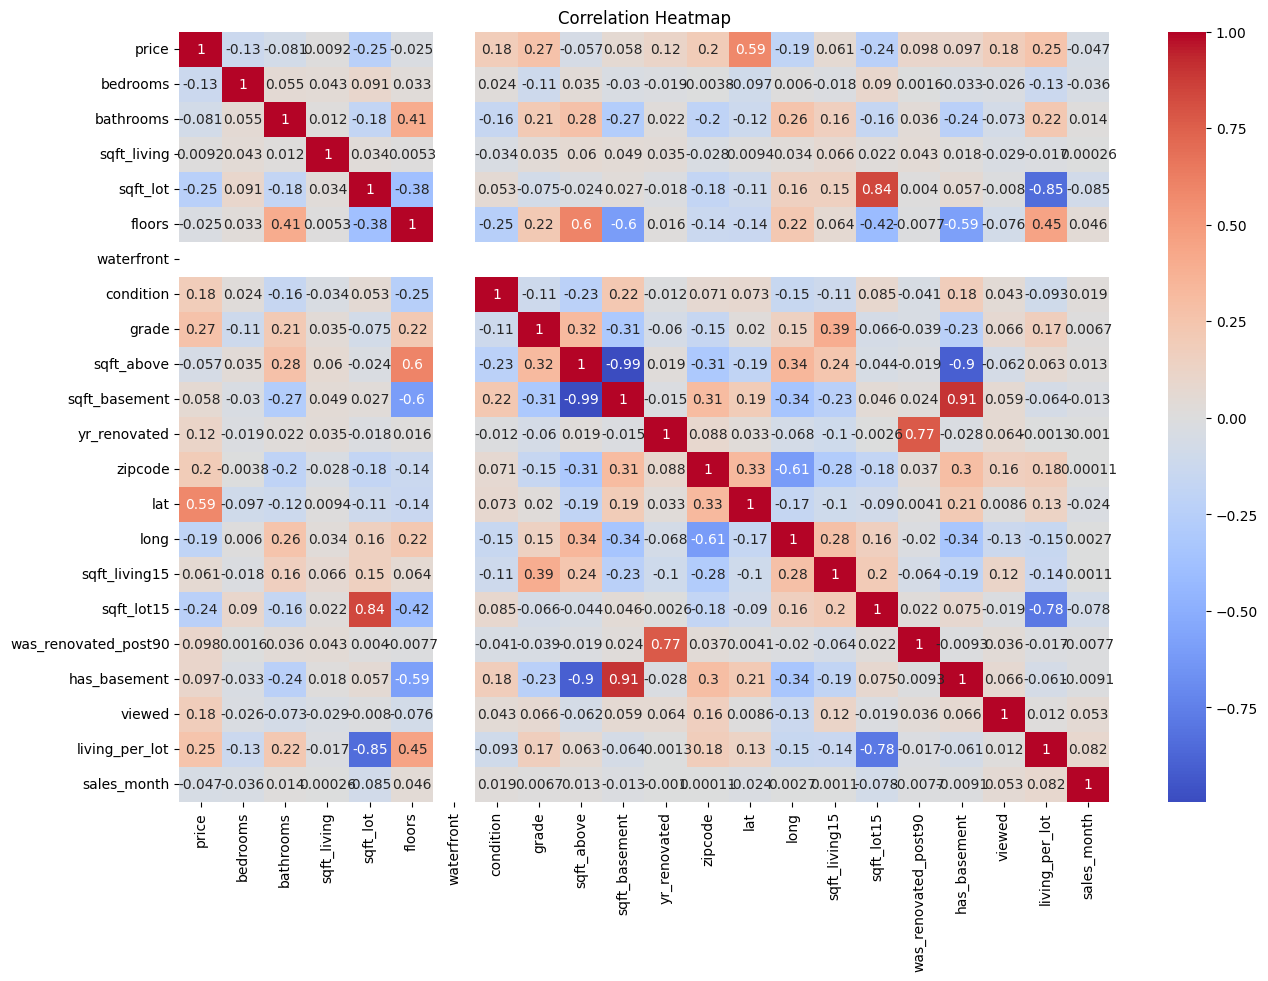

In [568]:
# Correlation matrix
corr = training_df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [572]:
training_df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8     2015-04-15  229500.0         3          1         1780      7470   
14    2015-03-12  530000.0         5          2         1810      4850   
59    2015-02-23  430000.0         4          3         1850      9976   
76    2014-10-13  380000.0         4          1         1760      7300   
159   2014-10-03  320000.0         4          1         1760     11180   
...          ...       ...       ...        ...          ...       ...   
21428 2014-06-09  365000.0         3          2         1800      2700   
21442 2014-11-05  580000.0         3          2         1870      5300   
21509 2014-08-18  600000.0         2          2         1830      1988   
21549 2014-12-31  327500.0         3          2         1820      1866   
21585 2014-08-28  270000.0         3          2         1870      5000   

       floors  waterfront  condition  grade  ...     long  sqft_living15  \
8         1.0           0          3      7  ... -122.337           1780   
14        1.5           0          3      7  ... -122.394           1360   
59        2.0           0          3      8  ... -122.149           2270   
76        1.0           0          3      7  ... -122.125           1680   
159       1.0           0          4      8  ... -122.118           1730   
...       ...         ...        ...    ...  ...      ...            ...   
21428     2.0           0          3      8  ... -122.369           1580   
21442     1.0           0          3      8  ... -122.020           1870   
21509     2.0           0          3      9  ... -122.409           1800   
21549     2.0           0          3      8  ... -122.346           1660   
21585     2.0           0          3      7  ... -122.055           2170   

      sqft_lot15  was_renovated_post90  has_basement  viewed  \
8           8113                     0             1       0   
14          4850                     0             0       0   
59          8542                     0             0       0   
76          7500                     0             1       0   
159        11180                     0             0       0   
...          ...                   ...           ...     ...   
21428       2036                     0             0       0   
21442       5050                     0             0       0   
21509       2467                     0             1       0   
21549       6900                     0             1       0   
21585       5399                     0             0       0   

                     coord  living_per_lot  sales_month  sales_quarter  
8      (47.5123, -122.337)        0.238286            4             Q2  
14       (47.67, -122.394)        0.373196            3             Q1  
59     (47.5059, -122.149)        0.185445            2             Q1  
76     (47.6034, -122.125)        0.241096           10             Q4  
159    (47.4715, -122.118)        0.157424           10             Q4  
...                    ...             ...          ...            ...  
21428  (47.5458, -122.369)        0.666667            6             Q2  
21442   (47.7106, -122.02)        0.352830           11             Q4  
21509  (47.5779, -122.409)        0.920523            8             Q3  
21549  (47.4643, -122.346)        0.975348           12             Q4  
21585  (47.3339, -122.055)        0.374000            8             Q3  

[1178 rows x 26 columns]

In [573]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['date','coord','sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df


In [574]:
# Drop multicollinear features
training_df = drop_corrfeats(training_df)

In [575]:
training_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
8    229500.0         3          1         1780      7470     1.0           0   
14   530000.0         5          2         1810      4850     1.5           0   
59   430000.0         4          3         1850      9976     2.0           0   
76   380000.0         4          1         1760      7300     1.0           0   
159  320000.0         4          1         1760     11180     1.0           0   

     condition  grade  sqft_basement  ... yr_renovated  zipcode      lat  \
8            3      7            730  ...            0    98146  47.5123   
14           3      7              0  ...            0    98107  47.6700   
59           3      8              0  ...            0    98059  47.5059   
76           3      7            880  ...            0    98008  47.6034   
159          4      8              0  ...            0    98059  47.4715   

        long  was_renovated_post90  has_basement  viewed  living_per_lot  \
8   -122.337                     0             1       0        0.238286   
14  -122.394                     0             0       0        0.373196   
59  -122.149                     0             0       0        0.185445   
76  -122.125                     0             1       0        0.241096   
159 -122.118                     0             0       0        0.157424   

     sales_month  sales_quarter  
8              4             Q2  
14             3             Q1  
59             2             Q1  
76            10             Q4  
159           10             Q4  

[5 rows x 21 columns]

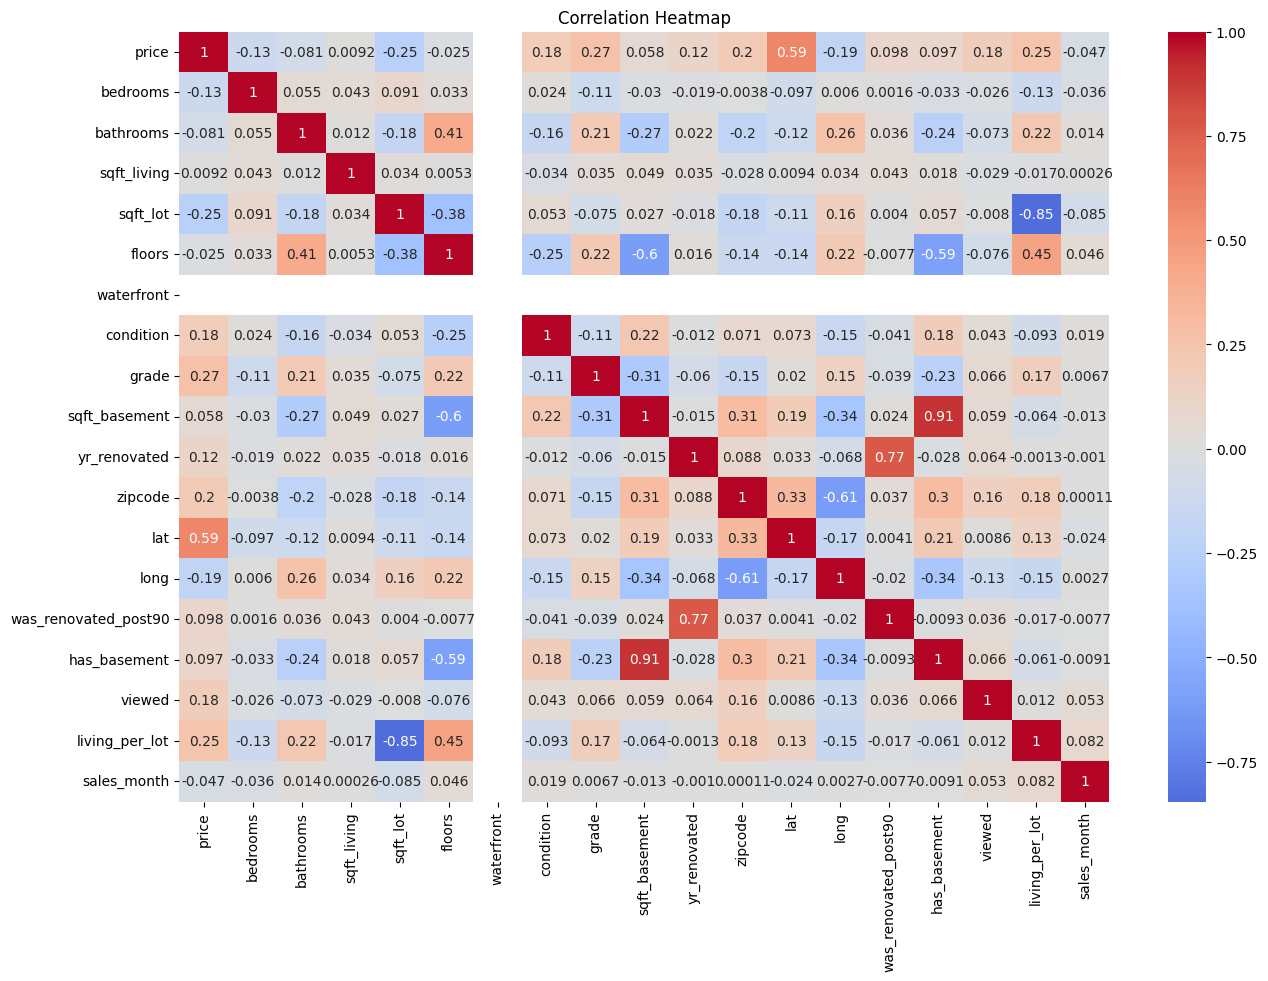

In [576]:
# Correlation matrix
corr = training_df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Before one-hot encoding and making further transformations, let us save a copy of our cleaned DataFrame with engineered features.



In [577]:
# Save a csv copy
training_df.to_csv('dfcleaned.csv')

In [578]:
# View head
training_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
8    229500.0         3          1         1780      7470     1.0           0   
14   530000.0         5          2         1810      4850     1.5           0   
59   430000.0         4          3         1850      9976     2.0           0   
76   380000.0         4          1         1760      7300     1.0           0   
159  320000.0         4          1         1760     11180     1.0           0   

     condition  grade  sqft_basement  ... yr_renovated  zipcode      lat  \
8            3      7            730  ...            0    98146  47.5123   
14           3      7              0  ...            0    98107  47.6700   
59           3      8              0  ...            0    98059  47.5059   
76           3      7            880  ...            0    98008  47.6034   
159          4      8              0  ...            0    98059  47.4715   

        long  was_renovated_post90  has_basement  viewed  living_per_lot  \
8   -122.337                     0             1       0        0.238286   
14  -122.394                     0             0       0        0.373196   
59  -122.149                     0             0       0        0.185445   
76  -122.125                     0             1       0        0.241096   
159 -122.118                     0             0       0        0.157424   

     sales_month  sales_quarter  
8              4             Q2  
14             3             Q1  
59             2             Q1  
76            10             Q4  
159           10             Q4  

[5 rows x 21 columns]

# One-hot encoding
We will create dummy variables for categorical variables and make use of one-hot encoding. Let us define a function that will one-hot encode, drop the first category and then drop the original feature.

In [580]:
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df


In [581]:
training_df=one_hot_encode(training_df,'yr_built')

In [582]:
training_df=one_hot_encode(training_df,'sales_quarter')

In [583]:
training_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
8    229500.0         3          1         1780      7470     1.0           0   
14   530000.0         5          2         1810      4850     1.5           0   
59   430000.0         4          3         1850      9976     2.0           0   
76   380000.0         4          1         1760      7300     1.0           0   
159  320000.0         4          1         1760     11180     1.0           0   

     condition  grade  sqft_basement  ...  has_basement  viewed  \
8            3      7            730  ...             1       0   
14           3      7              0  ...             0       0   
59           3      8              0  ...             0       0   
76           3      7            880  ...             1       0   
159          4      8              0  ...             0       0   

     living_per_lot  sales_month  1950_to_1975  1975_to_1997  1997_to_2015  \
8          0.238286            4             1             0             0   
14         0.373196            3             0             0             0   
59         0.185445            2             0             1             0   
76         0.241096           10             1             0             0   
159        0.157424           10             1             0             0   

     Q2  Q3  Q4  
8     1   0   0  
14    0   0   0  
59    0   0   0  
76    0   0   1  
159   0   0   1  

[5 rows x 25 columns]

In [584]:
training_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_renovated',
       'zipcode', 'lat', 'long', 'was_renovated_post90', 'has_basement',
       'viewed', 'living_per_lot', 'sales_month', '1950_to_1975',
       '1975_to_1997', '1997_to_2015', 'Q2', 'Q3', 'Q4'],
      dtype='object')

# normalization


# Remove unecessary features
As a final step let us remove features which will not be required for modelling. These are id as this is an identifier and date as we have the more meaningul sale_month feature instead.


In [415]:

# Define function to remove unecessary columns
def removecols(df):
    df = df.drop([ 'date'], axis = 1)
    return df

In [416]:
training_df=removecols(training_df)

In [ ]:
training_df=training_df.drop(['coord'],axis=1)

In [ ]:
#checking the normal distribution


In [433]:
training_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_renovated',
       'zipcode', 'lat', 'long', 'was_renovated_post90', 'has_basement',
       'viewed', 'living_per_lot', 'sales_month', '1950_to_1975',
       '1975_to_1997', '1997_to_2015', 'Q2', 'Q3', 'Q4'],
      dtype='object')

In [434]:
training_df["price"]

8        229500.0
14       530000.0
59       430000.0
76       380000.0
159      320000.0
           ...   
21428    365000.0
21442    580000.0
21509    600000.0
21549    327500.0
21585    270000.0
Name: price, Length: 1178, dtype: float64

# Modelling
Before beginning the modelling step, it is important that we consider what our goals are and what metrics of evaluation we will use.

As a starting point, we are looking to establish the following models, each meeting different criteria.

## Model A

This model will be generalisable. We will aim where possible to ensure it can be used as a basis towards creating a model for another area, so avoid features specific to King County such as exact zipcode. Provided we achieve a decent 
, we will try and avoid interactions and/or polynomial regression. We will also try and limit the number of features if possible.

## Model B

This model will be the most accurate whilst avoiding unecessary complexity.

## Model C

This model will be our most accurate and most likely complex. We will aim for the highest adjusted 
 value and lowest Root Mean Squared Error (RMSE).

For all models, we only wish to have statistically significant features (p-value below 0.05).

Will consider an itterative approach to modelling and discuss which models best fit the above criteria in section 9.



# Simple linear regression

We will begin with a simple linear regression model, using the single feature of sqft_living which looked to be a good predictor based on satisfying the linearity assumption and being positively correlated with price.

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8      229500.0         3          1         1780      7470     1.0   
14     530000.0         5          2         1810      4850     1.5   
59     430000.0         4          3         1850      9976     2.0   
76     380000.0         4          1         1760      7300     1.0   
159    320000.0         4          1         1760     11180     1.0   
...         ...       ...        ...          ...       ...     ...   
21428  365000.0         3          2         1800      2700     2.0   
21442  580000.0         3          2         1870      5300     1.0   
21509  600000.0         2          2         1830      1988     2.0   
21549  327500.0         3          2         1820      1866     2.0   
21585  270000.0         3          2         1870      5000     2.0   

       waterfront  condition  grade  sqft_basement  ...  has_basement  viewed  \
8               0          3      7            730  ...             1       0   
14              0          3      7              0  ...             0       0   
59              0          3      8              0  ...             0       0   
76              0          3      7            880  ...             1       0   
159             0          4      8              0  ...             0       0   
...           ...        ...    ...            ...  ...           ...     ...   
21428           0          3      8              0  ...             0       0   
21442           0          3      8              0  ...             0       0   
21509           0          3      9            300  ...             1       0   
21549           0          3      8            250  ...             1       0   
21585           0          3      7              0  ...             0       0   

       living_per_lot  sales_month  1950_to_1975  1975_to_1997  1997_to_2015  \
8            0.238286            4             1             0             0   
14           0.373196            3             0             0             0   
59           0.185445            2             0             1             0   
76           0.241096           10             1             0             0   
159          0.157424           10             1             0             0   
...               ...          ...           ...           ...           ...   
21428        0.666667            6             0             0             1   
21442        0.352830           11             0             0             1   
21509        0.920523            8             0             0             1   
21549        0.975348           12             0             0             1   
21585        0.374000            8             0             0             1   

       Q2  Q3  Q4  
8       1   0   0  
14      0   0   0  
59      0   0   0  
76      0   0   1  
159     0   0   1  
...    ..  ..  ..  
21428   1   0   0  
21442   0   0   1  
21509   0   1   0  
21549   0   0   1  
21585   0   1   0  

[1178 rows x 25 columns]

In [419]:
X=training_df.iloc[:,1:]
y=training_df['price']

In [420]:
print(X.shape)

(1178, 24)


In [421]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [422]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [423]:
# 


In [424]:
# Create linear regression object
linreg = LinearRegression()





In [425]:
X_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
6159          3          2         1780     10395     1.0           0   
6642          4          3         1830      9548     2.0           0   
1000          4          2         1830      4590     2.0           0   
18541         3          3         1860      2218     3.0           0   
11423         3          2         1830      7651     2.0           0   

       condition  grade  sqft_basement  yr_renovated  ...  has_basement  \
6159           3      8              0             0  ...             0   
6642           3      7              0             0  ...             0   
1000           3      8              0             0  ...             0   
18541          3      8              0             0  ...             0   
11423          3      8              0             0  ...             0   

       viewed  living_per_lot  sales_month  1950_to_1975  1975_to_1997  \
6159        0        0.171236            6             1             0   
6642        0        0.191663            5             0             1   
1000        0        0.398693            4             0             0   
18541       0        0.838593           10             0             0   
11423       0        0.239184            8             0             1   

       1997_to_2015  Q2  Q3  Q4  
6159              0   1   0   0  
6642              0   1   0   0  
1000              0   1   0   0  
18541             1   0   0   1  
11423             0   0   1   0  

[5 rows x 24 columns]

In [426]:
# # Fit on training data
linreg.fit(X_train,y_train)


LinearRegression()

In [428]:

y_pred=linreg.predict(X_test)

In [431]:
#performance metrics
from sklearn.metrics import r2_score

In [432]:
r2_score(y_test,y_pred)

0.5756922537496212

# 